# Import

## Library

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import math

In [2]:
#Library options
pd.set_option("display.max_columns", 500)

## Dataset

In [3]:
# zipfile name
zip_name = "world-foodfeed-production_clean.zip"

In [4]:
# zipfile's elements
zip_elements = []

In [5]:
# extract zipfile and gather its elements
with zipfile.ZipFile(zip_name, 'r') as _zip:
    _zip.extractall()
    zip_elements = _zip.namelist()

In [6]:
# csv names
csv_supply_info = "supply_info_clean.csv"
csv_supply = "supply_clean.csv"

In [7]:
old_content = [csv_supply_info, csv_supply]

In [8]:
df =  pd.read_csv(csv_supply_info, encoding = "latin-1")
df_supply = pd.read_csv(csv_supply, encoding = "latin-1")

### Test Dataset Content

Check whether there is a change in the zipfile content since the last time

In [9]:
# Must be True
old_content == zip_elements

True

# Analysis

## Investigate Datasets

In [10]:
df

,SupplyId,AreaAbbreviation,AreaCode,Area,Item Code,Item,Element Code,Element,Latitude,Longitude
0,1,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,33.94,67.71
1,2,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,33.94,67.71
2,3,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,33.94,67.71
3,4,AFG,2,Afghanistan,2513,Barley and products,5142,Food,33.94,67.71
4,5,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,33.94,67.71
5,6,AFG,2,Afghanistan,2514,Maize and products,5142,Food,33.94,67.71
6,7,AFG,2,Afghanistan,2517,Millet and products,5142,Food,33.94,67.71
7,8,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,33.94,67.71
8,9,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,33.94,67.71
9,10,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,33.94,67.71


In [11]:
df.describe()

,SupplyId,AreaCode,Item Code,Element Code,Latitude,Longitude
count,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000,21477.000000
mean,10739.000000,125.449411,2694.211529,5211.687154,20.450613,15.794445
std,6200.020202,72.868149,148.973406,146.820079,24.628336,66.012104
min,1.000000,1.000000,2511.000000,5142.000000,-40.900000,-172.100000
25%,5370.000000,63.000000,2561.000000,5142.000000,6.430000,-11.780000
50%,10739.000000,120.000000,2640.000000,5142.000000,20.590000,19.150000
75%,16108.000000,188.000000,2782.000000,5142.000000,41.150000,46.870000
max,21477.000000,276.000000,2961.000000,5521.000000,64.960000,179.410000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21477 entries, 0 to 21476
Data columns (total 10 columns):
SupplyId            21477 non-null int64
AreaAbbreviation    21477 non-null object
AreaCode            21477 non-null int64
Area                21477 non-null object
Item Code           21477 non-null int64
Item                21477 non-null object
Element Code        21477 non-null int64
Element             21477 non-null object
Latitude            21477 non-null float64
Longitude           21477 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.6+ MB


In [13]:
df_supply

,SupplyId,Year,Supply1000Tonnes
0,1,1961,1928.0
1,2,1961,183.0
2,3,1961,76.0
3,4,1961,237.0
4,5,1961,210.0
5,6,1961,403.0
6,7,1961,17.0
7,8,1961,0.0
8,9,1961,111.0
9,10,1961,45.0


## Total supply

I am curious about the total supply (food + feed) towards the years. In my opinion it must grow almost every year, because of the population growth. In the next chart I am going to show the supply growth per year.

In [14]:
# Create subset of the year and (food+ feed) columns
df_supply_sub = df_supply.loc[:,["Year", "Supply1000Tonnes"]]

Here is the table that will support our chart. We can see the summations of the suppliment in every year. If we scroll down we can see it growing from 1961 to 2013 as I suspected. It is hard to see how much is the difference or how much did it grow from year to year. Let's see it in a chart!

In [15]:
# Group by Year
df_supply_grouped = df_supply_sub.groupby("Year", as_index = False).sum()
df_supply_grouped

,Year,Supply1000Tonnes
0,1961,3502611.0
1,1962,3601632.0
2,1963,3685624.0
3,1964,3765645.0
4,1965,3902533.0
5,1966,4053790.0
6,1967,4133260.0
7,1968,4276697.0
8,1969,4382988.0
9,1970,4489204.0


 The chart shows us there is an enormous jump around 1991, which increases the overal suppliment with a big step. I can imagine 2 linear models fitting on this chart. The splitting line would be that big step around 1991. If we are watching this line, examinating it, we can imagine if there wasn't that skewed line, it would be a non linear line.

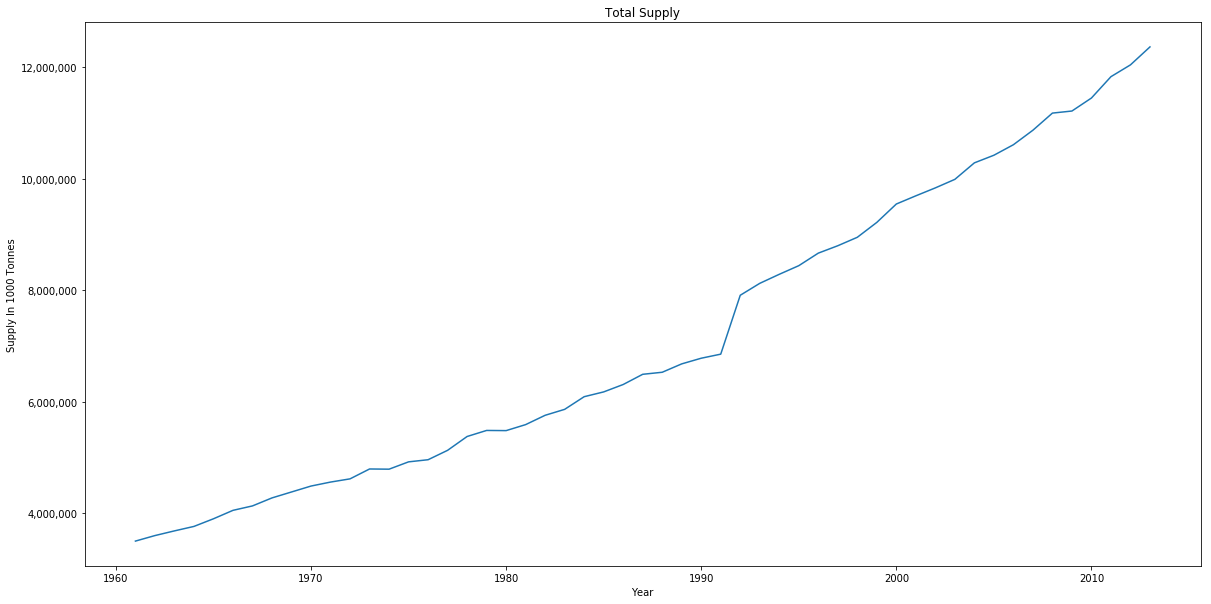

In [16]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped.Year, df_supply_grouped.Supply1000Tonnes)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

By filtering the years between 1990 and 1995 we see the incredible increament is from 1991 to 1992. It is a 15.4 % growing from 6,853,625 to 7,909,299 1000 tonnes.

In [17]:
# Filter the Year variable
df_supply_grouped_subset = \
    df_supply_grouped[\
        (df_supply_grouped.Year >= 1990) & (df_supply_grouped.Year < 1995)]

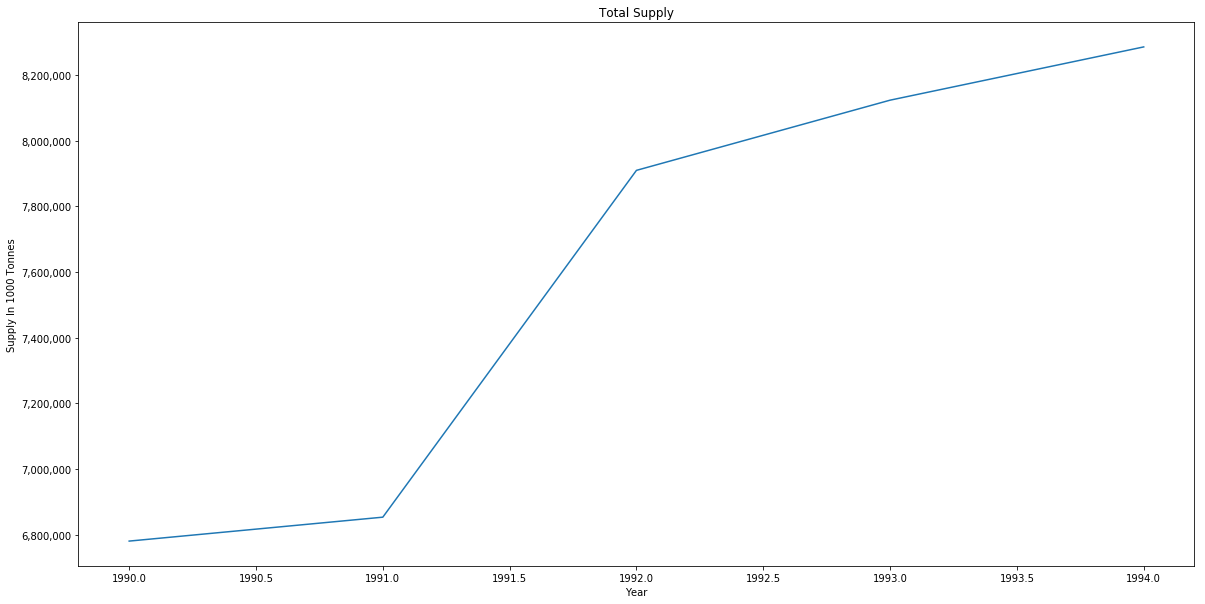

In [18]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped_subset.Year, df_supply_grouped_subset.Supply1000Tonnes)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

In [19]:
supplyIn1991 = df_supply_grouped_subset[df_supply_grouped_subset.Year == 1991].Supply1000Tonnes.item()
supplyIn1992 = df_supply_grouped_subset[df_supply_grouped_subset.Year == 1992].Supply1000Tonnes.item()

In [20]:
# Grow from 1991 to 1992
supplyIn1992 / supplyIn1991

1.1540314796914042

In [21]:
supplyIn1991

6853625.0

In [22]:
supplyIn1992

7909299.0

In [23]:
difference_between1991_1992 = supplyIn1992-supplyIn1991
difference_between1991_1992

1055674.0

### Machine Learning

#### Linear Regression

Let's fit two linear lines to the dataset. Each of these two lines are going to represent the predictions. I splitted the dataset at 1991-2 so the first line's interval is from 1961 to 1991, meanhwhile the other's is from 1992 to 2013.

In [24]:
# Split First part
df_supply_grouped_by_year_first_part = \
    df_supply_grouped[df_supply_grouped.Year <= 1991]

In [25]:
# Split Second part
df_supply_grouped_by_year_second_part = \
    df_supply_grouped[df_supply_grouped.Year >= 1992]

In [26]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

In [27]:
# Training X for the first set
X_part1 = df_supply_grouped_by_year_first_part.drop("Supply1000Tonnes", axis = 1)

In [28]:
# Train the model using the training sets
regr1.fit(X_part1, df_supply_grouped_by_year_first_part.Supply1000Tonnes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Predictions
predicted_supply_part1 = regr1.predict(X_part1)

Here we can see the first part's values and the regression model which is fitting very well.Because of the small training set size, this can also be a polynomial model. It is hard to decide what model would be the best choice, because this can be for example a small part of a cubic line. 

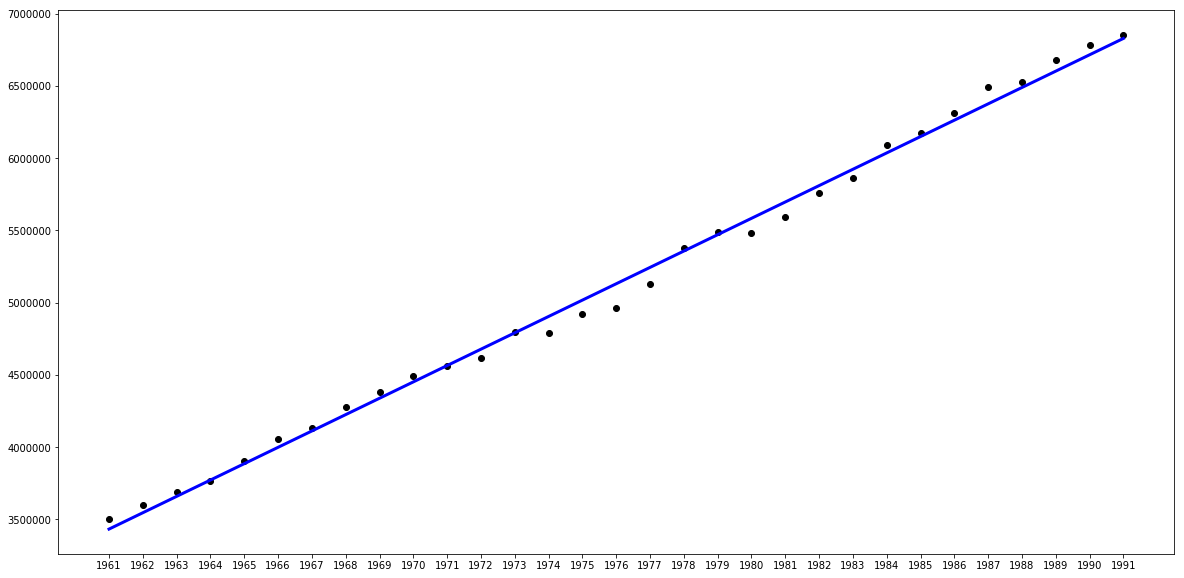

In [30]:
# Plot the outputs
ax = plt.subplots(figsize=(20, 10))
plt.scatter(X_part1, df_supply_grouped_by_year_first_part.Supply1000Tonnes,  color='black')
plt.plot(X_part1, predicted_supply_part1, color='blue', linewidth=3)

##plt.xticks(())
##plt.yticks(())

plt.show()

I wanted to show all of the values with the first part's linear model. It can be seen if we draw a longer line, it doesn't on fit the second part's values.

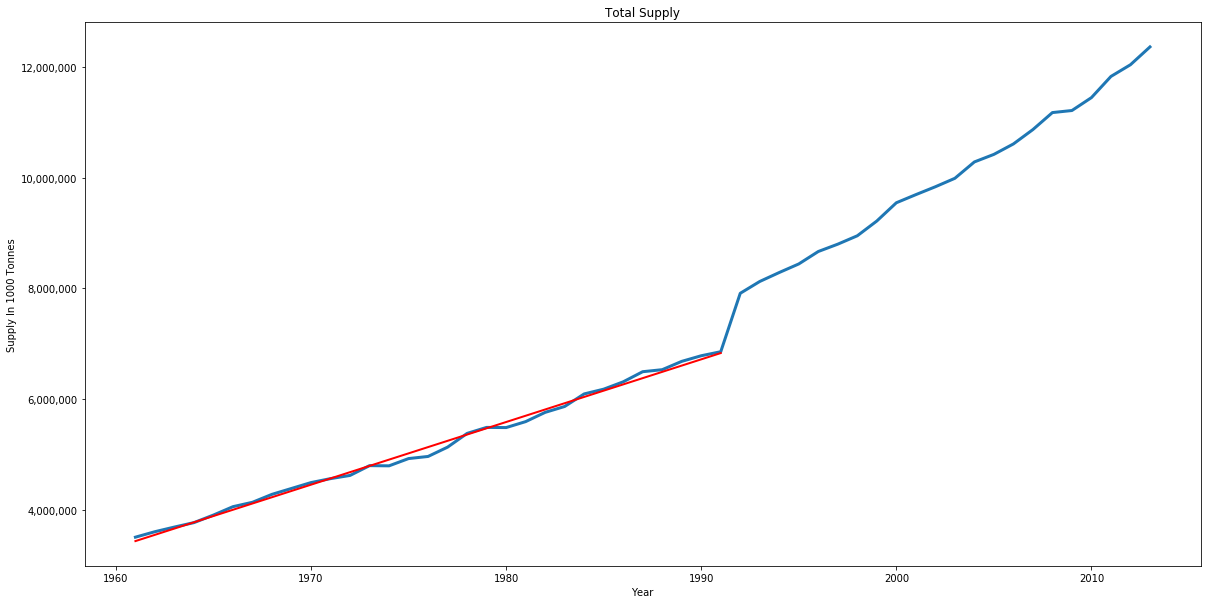

In [31]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped.Year, df_supply_grouped.Supply1000Tonnes, linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.plot(X_part1, predicted_supply_part1, color='red', linewidth=2)
plt.draw()

In [32]:
# Create regression model
regr2 = linear_model.LinearRegression()

In [33]:
# Select the X values from the training set
X_part2 = df_supply_grouped_by_year_second_part.drop("Supply1000Tonnes", axis = 1)

In [34]:
# Fit a model to the training set
regr2.fit(X_part2, df_supply_grouped_by_year_second_part.Supply1000Tonnes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
# Predictions
predicted_supply_part2 = regr2.predict(X_part2)

Here is the second part's values with its model. Like on the previous part, this can be also a polynomial model.

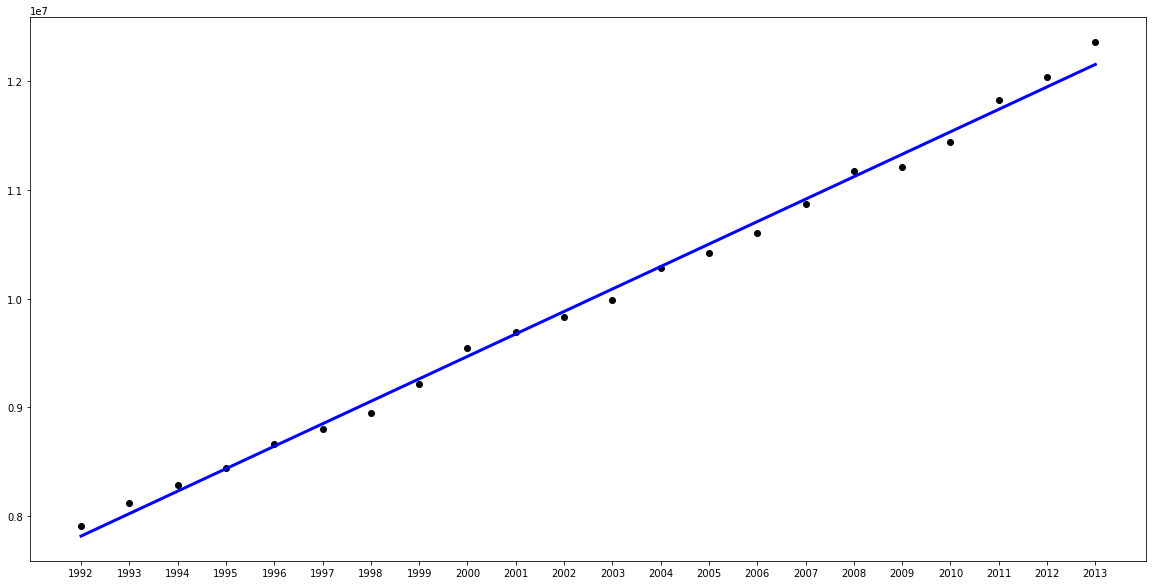

In [36]:
# Plot outputs
ax = plt.subplots(figsize=(20, 10))
plt.scatter(X_part2, df_supply_grouped_by_year_second_part.Supply1000Tonnes,  color='black')
plt.plot(X_part2, predicted_supply_part2, color='blue', linewidth=3)

##plt.xticks(())
##plt.yticks(())

plt.show()

The values of the second part is more wavier around the model than the first part.

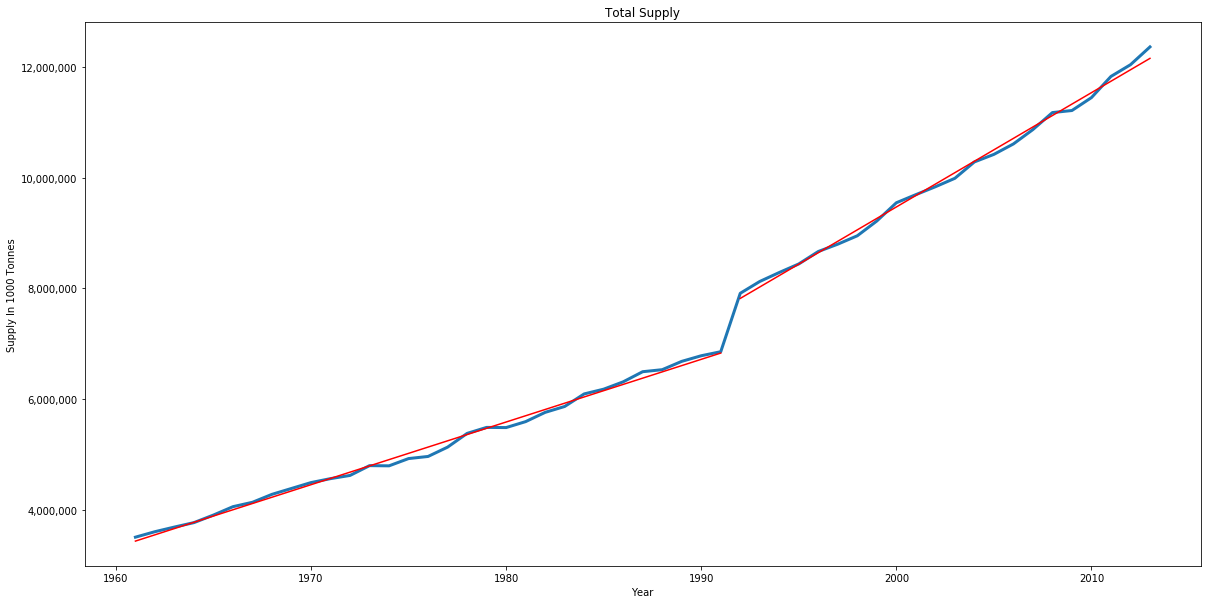

In [37]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped.Year, df_supply_grouped.Supply1000Tonnes, linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.plot(X_part1, predicted_supply_part1, color='red', linewidth=1.5)
plt.plot(X_part2, predicted_supply_part2, color='red', linewidth=1.5)
plt.draw()

Now I am going to examine all the data assuming there is wan no big jump from 1991 to 1992. I am curious about the growing tedency, maybe a polynomial function fits better on the dataset. But of course we have to be aware of that maybe after that big jump something strange happened with the food/feed production, for example an innovation that rearranged the suppliment.

In [38]:
# Get the year 1992
X_1992 = df_supply_grouped_by_year_second_part\
    [df_supply_grouped_by_year_second_part["Year"] == 1992].drop(["Supply1000Tonnes"], axis = 1)
X_1992

,Year
31,1992


In [39]:
# Predict a value for this year, is wasn't a big jump
prediction_1992 = regr1.predict(X_1992)
prediction_1992

array([6942392.27096772])

In [40]:
# Real value for 1992
real_value_1992 = df_supply_grouped_by_year_second_part[df_supply_grouped_by_year_second_part["Year"] == 1992].Supply1000Tonnes
real_value_1992

31    7909299.0
Name: Supply1000Tonnes, dtype: float64

In [41]:
# Calculate the difference between the real and the predicted values
offset = real_value_1992 - prediction_1992
offset

31    966906.729032
Name: Supply1000Tonnes, dtype: float64

In [42]:
# Copy the original, grouped dataset
df_supply_grouped_without_difference = df_supply_grouped.copy()

In [43]:
# Extract the offset from the part 2
df_supply_grouped_without_difference["Supply1000Tonnes"] = \
df_supply_grouped.apply(lambda x: x["Supply1000Tonnes"] if x["Year"] <= 1991 else x["Supply1000Tonnes"] - offset, axis = 1)

We have the dataset without the difference because later if we make a prediction, we would want the most recent data to be in place. So I am going to add back the offset to all the data.

In [44]:
df_supply_grouped_without_difference

,Year,Supply1000Tonnes
0,1961,3.50261e+06
1,1962,3.60163e+06
2,1963,3.68562e+06
3,1964,3.76564e+06
4,1965,3.90253e+06
5,1966,4.05379e+06
6,1967,4.13326e+06
7,1968,4.2767e+06
8,1969,4.38299e+06
9,1970,4.4892e+06


In [45]:
# Add back the offset
df_supply_grouped_without_difference["Supply1000Tonnes"] = \
    df_supply_grouped_without_difference["Supply1000Tonnes"].apply(lambda x: x + offset)

In [46]:
df_supply_grouped_without_difference

,Year,Supply1000Tonnes
0,1961,4.469518e+06
1,1962,4.568539e+06
2,1963,4.652531e+06
3,1964,4.732552e+06
4,1965,4.869440e+06
5,1966,5.020697e+06
6,1967,5.100167e+06
7,1968,5.243604e+06
8,1969,5.349895e+06
9,1970,5.456111e+06


Plot the more smoother line.

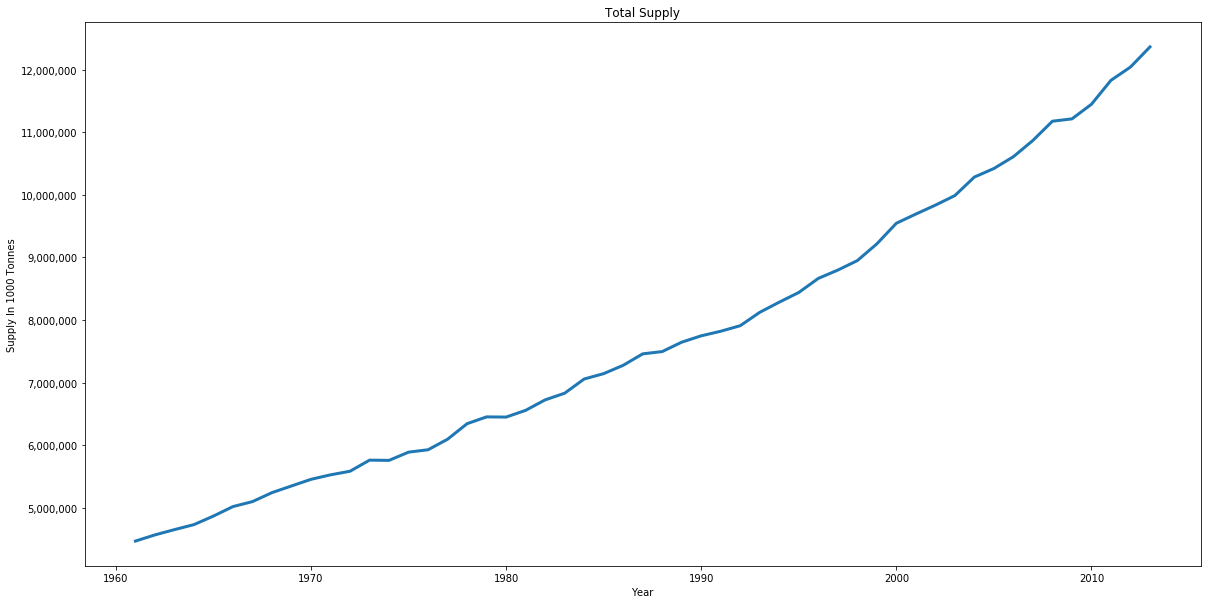

In [47]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped_without_difference.Year,\
         df_supply_grouped_without_difference.Supply1000Tonnes, linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

As we can see the first part of the values is just moved up a little bit, making the whol dataset more smoother, more natural than before. Now it is time to make a polynomial model that fits to this data.

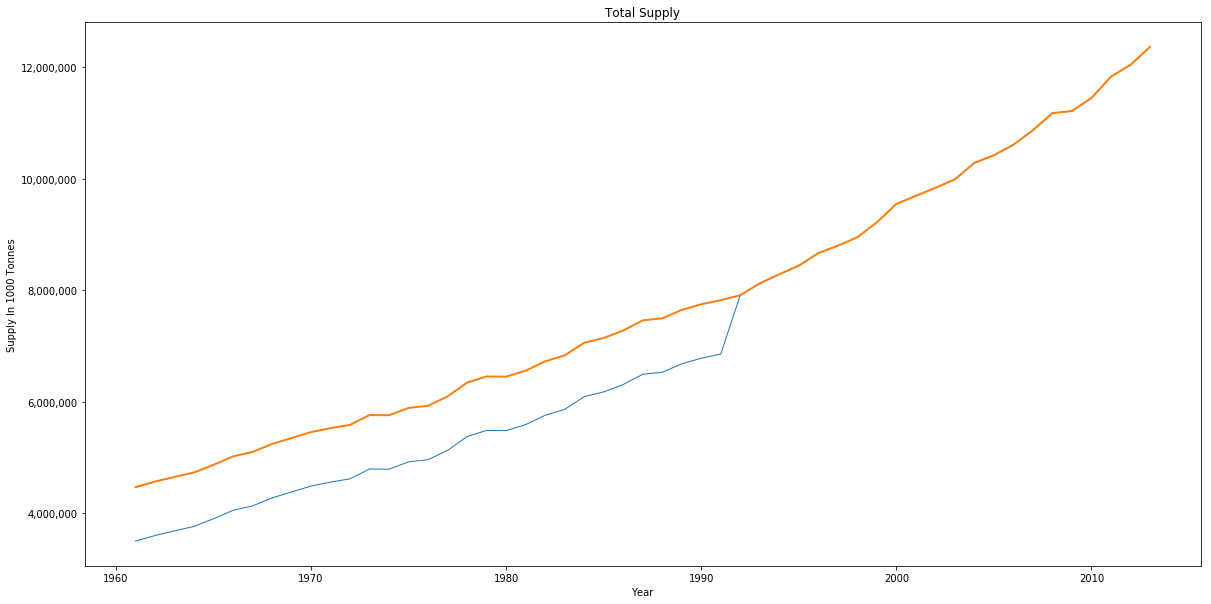

In [48]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped.Year, df_supply_grouped.Supply1000Tonnes, linewidth = 1)
plt.plot(df_supply_grouped_without_difference.Year,\
         df_supply_grouped_without_difference.Supply1000Tonnes, linewidth = 2)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

#### Polynomial Regression

##### Create polynomial feature set

In [49]:
# Initialize polynomial feature maker obj
poly = PolynomialFeatures(degree = 3)

In [50]:
poly

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [51]:
# Select Training set X
X_train = df_supply_grouped_without_difference.drop(["Supply1000Tonnes"], axis = 1)
X_train

,Year
0,1961
1,1962
2,1963
3,1964
4,1965
5,1966
6,1967
7,1968
8,1969
9,1970


In [52]:
# Select Y for training set X
Y_train = df_supply_grouped_without_difference.Supply1000Tonnes

In [53]:
# Create polynomial feature set
poly_X = poly.fit_transform(X_train)
poly_X

array([[1.00000000e+00, 1.96100000e+03, 3.84552100e+06, 7.54106668e+09],
       [1.00000000e+00, 1.96200000e+03, 3.84944400e+06, 7.55260913e+09],
       [1.00000000e+00, 1.96300000e+03, 3.85336900e+06, 7.56416335e+09],
       [1.00000000e+00, 1.96400000e+03, 3.85729600e+06, 7.57572934e+09],
       [1.00000000e+00, 1.96500000e+03, 3.86122500e+06, 7.58730712e+09],
       [1.00000000e+00, 1.96600000e+03, 3.86515600e+06, 7.59889670e+09],
       [1.00000000e+00, 1.96700000e+03, 3.86908900e+06, 7.61049806e+09],
       [1.00000000e+00, 1.96800000e+03, 3.87302400e+06, 7.62211123e+09],
       [1.00000000e+00, 1.96900000e+03, 3.87696100e+06, 7.63373621e+09],
       [1.00000000e+00, 1.97000000e+03, 3.88090000e+06, 7.64537300e+09],
       [1.00000000e+00, 1.97100000e+03, 3.88484100e+06, 7.65702161e+09],
       [1.00000000e+00, 1.97200000e+03, 3.88878400e+06, 7.66868205e+09],
       [1.00000000e+00, 1.97300000e+03, 3.89272900e+06, 7.68035432e+09],
       [1.00000000e+00, 1.97400000e+03, 3.89667600e

In [54]:
# Regression obj for this polynomial model LinearRegression obj works here
poly_reg  = linear_model.LinearRegression()

In [55]:
# Train the model
poly_reg.fit(poly_X, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [56]:
# Make predictions
poly_pred = poly_reg.predict(poly_X)

In [57]:
# Prediction 1D array (1:X)
poly_pred

array([ 4462073.0920105 ,  4569876.85507202,  4676583.95602417,
        4782362.90890503,  4887382.22799683,  4991810.42697144,
        5095816.02035522,  5199567.52206421,  5303233.44577026,
        5406982.30599976,  5510982.61679077,  5615402.89181519,
        5720411.64535522,  5826177.39169312,  5932868.64437866,
        6040653.91793823,  6149701.72616577,  6260180.58309937,
        6372259.00314331,  6486105.49984741,  6601888.5874939 ,
        6719776.78024292,  6839938.59213257,  6962542.53695679,
        7087757.12911987,  7215750.88253784,  7346692.31100464,
        7480749.9291687 ,  7618092.25045776,  7758887.78915405,
        7903305.05953979,  8051512.57540894,  8203678.85092163,
        8359972.40023804,  8520561.73703003,  8685615.3757019 ,
        8855301.83041382,  9029789.61459351,  9209247.24301147,
        9393843.22946167,  9583746.08786011,  9779124.33236694,
        9980146.47702026, 10186981.03598022, 10399796.52304077,
       10618761.45285034, 10844044.33871

By plotting the polynomial model with degree 3 and the original dataset it is seen it fits well, following the values. Let's see it in a big picture, what happens before and after the dataset. What are the predictions.

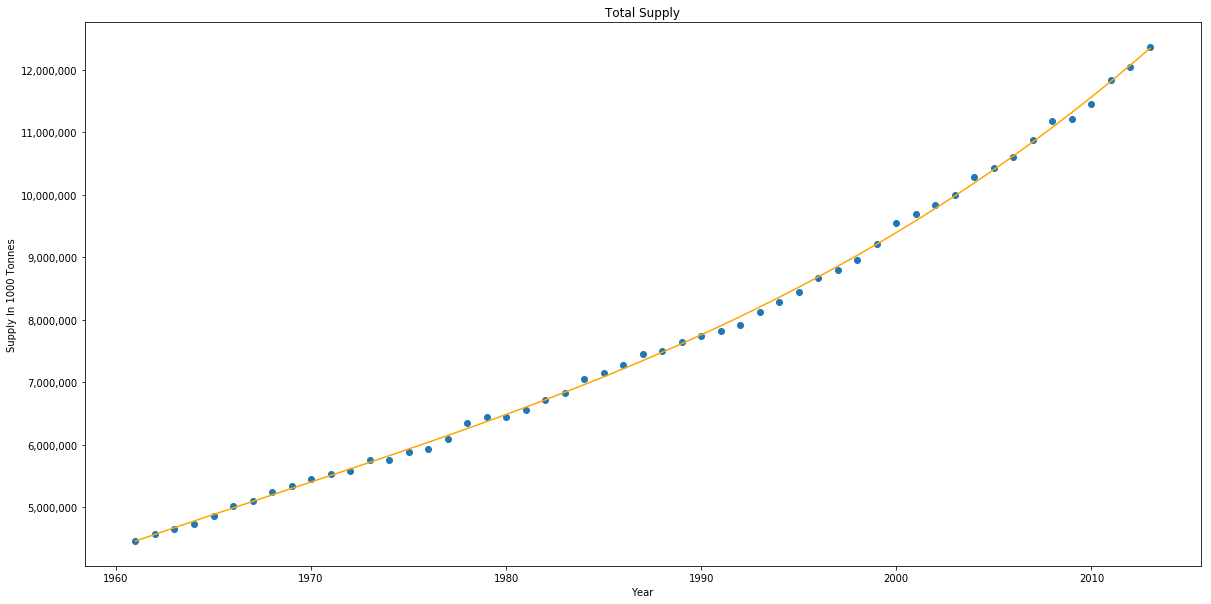

In [58]:
ax = plt.subplots(figsize=(20, 10))
plt.scatter(df_supply_grouped_without_difference.Year,\
         df_supply_grouped_without_difference.Supply1000Tonnes)
plt.plot(df_supply_grouped_without_difference.Year, \
        poly_pred, color = "orange", linewidth = 1.5)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

In [59]:
# From and To intervals
_from = 1900
_to = 2050

In [60]:
# Create an initial array for the test_x
X_test = np.arange(_to - _from +1)
X_test

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])

In [61]:
# Corrigate the X_test to be the real numbers we are curioused about
X_test = X_test + 1900
X_test

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 20

In [62]:
# Reshape dataset, because it is now a 1D dataset and we need 2D
X_test = X_test.reshape(-1, 1)
X_test

array([[1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [19

In [63]:
# Transform the new X_test to create more feature for the polynomial model prediction
X_test_poly = poly.fit_transform(X_test)

In [64]:
# Predict the values
poly_pred_test =  poly_reg.predict(X_test_poly)

Now we can see what would the model predict from 1900 to 2050. It is hard to predict what was before 1960. We can only guess even if we assume there were no big wars because this data is just not enough information to predict those years. These days it seems like it started to grow exponentially, maybe because of the Information system innovations. Drones, self driving tractors with GPS helping the agriculture to produce more products.

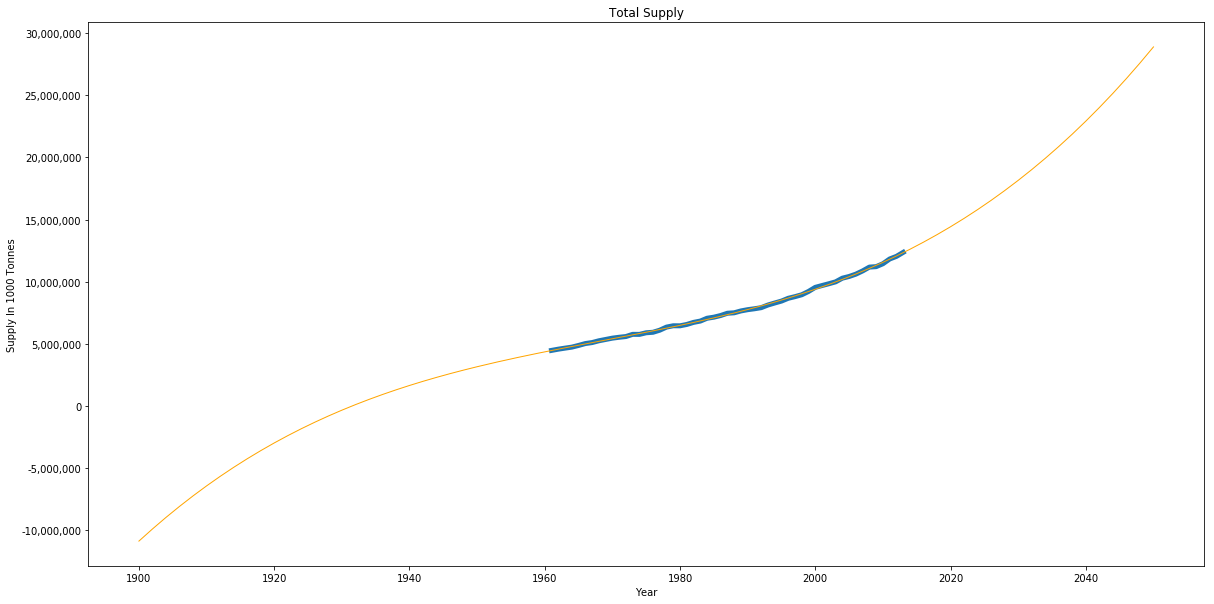

In [65]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped_without_difference.Year,\
         df_supply_grouped_without_difference.Supply1000Tonnes, linewidth = 5)
plt.plot(X_test, \
        poly_pred_test, color = "orange", linewidth = 1)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

It had been more precise if I'd s

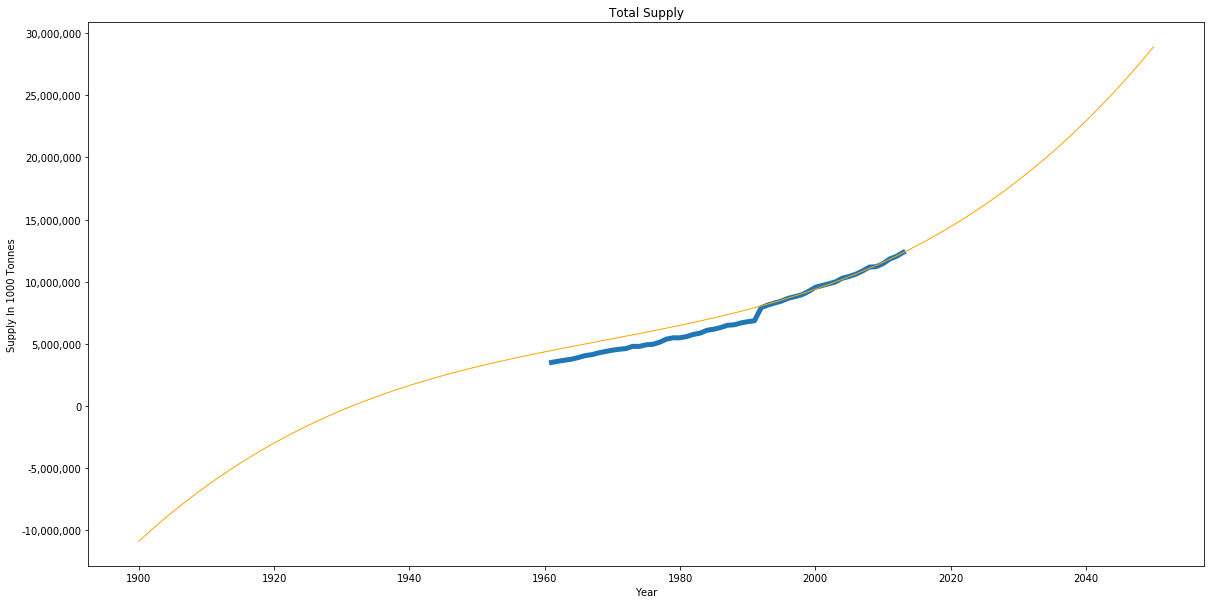

In [66]:
ax = plt.subplots(figsize=(20, 10))
plt.plot(df_supply_grouped.Year,\
         df_supply_grouped.Supply1000Tonnes, linewidth = 5)
plt.plot(X_test, \
        poly_pred_test, color = "orange", linewidth = 1)
plt.xlabel('Year')
plt.ylabel('Supply In 1000 Tonnes')
plt.title("Total Supply")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values
plt.draw()

## Corrigate Data Cleaning

Tthere are some redundant columns in the tables. Let's clean this untidy data.

### Area

Start with the area redundancy

In [67]:
# Select the area columns
df_area = df.loc[:,["AreaAbbreviation", "AreaCode", "Area", "Latitude", "Longitude"]]

In [68]:
df_area.head()

,AreaAbbreviation,AreaCode,Area,Latitude,Longitude
0,AFG,2,Afghanistan,33.94,67.71
1,AFG,2,Afghanistan,33.94,67.71
2,AFG,2,Afghanistan,33.94,67.71
3,AFG,2,Afghanistan,33.94,67.71
4,AFG,2,Afghanistan,33.94,67.71


In [69]:
# Remove duplicates
df_area = df_area.drop_duplicates()
df_area.head()

,AreaAbbreviation,AreaCode,Area,Latitude,Longitude
0,AFG,2,Afghanistan,33.94,67.71
83,ALB,3,Albania,41.15,20.17
206,DZA,4,Algeria,28.03,1.66
330,AGO,7,Angola,-11.20,17.87
439,ATG,8,Antigua and Barbuda,17.06,-61.80


In [70]:
# reset index
df_area= df_area.reset_index(drop = True)
df_area.head()

,AreaAbbreviation,AreaCode,Area,Latitude,Longitude
0,AFG,2,Afghanistan,33.94,67.71
1,ALB,3,Albania,41.15,20.17
2,DZA,4,Algeria,28.03,1.66
3,AGO,7,Angola,-11.20,17.87
4,ATG,8,Antigua and Barbuda,17.06,-61.80


Now remove the redundant columns from the original

In [71]:
# drop area redundancy
df = df.drop(["AreaAbbreviation", "AreaCode", "Latitude", "Longitude"], axis = 1)
df.head()

,SupplyId,Area,Item Code,Item,Element Code,Element
0,1,Afghanistan,2511,Wheat and products,5142,Food
1,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food
2,3,Afghanistan,2513,Barley and products,5521,Feed
3,4,Afghanistan,2513,Barley and products,5142,Food
4,5,Afghanistan,2514,Maize and products,5521,Feed


### Item

In [72]:
# Select Items
df_item = df.loc[:, ["Item", "Item Code"]]
df_item.head()

,Item,Item Code
0,Wheat and products,2511
1,Rice (Milled Equivalent),2805
2,Barley and products,2513
3,Barley and products,2513
4,Maize and products,2514


In [73]:
# drop duplicates
df_item = df_item.drop_duplicates()
df_item.head()

,Item,Item Code
0,Wheat and products,2511
1,Rice (Milled Equivalent),2805
2,Barley and products,2513
4,Maize and products,2514
6,Millet and products,2517


In [74]:
# Reindex
df_item = df_item.reset_index(drop = True)
df_item.head()

,Item,Item Code
0,Wheat and products,2511
1,Rice (Milled Equivalent),2805
2,Barley and products,2513
3,Maize and products,2514
4,Millet and products,2517


Now drop from the original table

In [75]:
# drop redundancy
df = df.drop(["Item Code"], axis = 1)
df.head()

,SupplyId,Area,Item,Element Code,Element
0,1,Afghanistan,Wheat and products,5142,Food
1,2,Afghanistan,Rice (Milled Equivalent),5142,Food
2,3,Afghanistan,Barley and products,5521,Feed
3,4,Afghanistan,Barley and products,5142,Food
4,5,Afghanistan,Maize and products,5521,Feed


### Element

The last one is the element

In [76]:
# Select element columns
df_element = df.loc[:, ["Element Code", "Element"]]
df_element.head()

,Element Code,Element
0,5142,Food
1,5142,Food
2,5521,Feed
3,5142,Food
4,5521,Feed


In [77]:
# Remove duplicates
df_element = df_element.drop_duplicates()
df_element.head()

,Element Code,Element
0,5142,Food
2,5521,Feed


In [78]:
# Reset index
df_element = df_element.reset_index(drop = True)
df_element.head()

,Element Code,Element
0,5142,Food
1,5521,Feed


Remove from the original dataframe

In [79]:
# drop redundant elements
df = df.drop(["Element Code"], axis = 1)
df.head()

,SupplyId,Area,Item,Element
0,1,Afghanistan,Wheat and products,Food
1,2,Afghanistan,Rice (Milled Equivalent),Food
2,3,Afghanistan,Barley and products,Feed
3,4,Afghanistan,Barley and products,Food
4,5,Afghanistan,Maize and products,Feed


It became a better table.

## Data analysis continued

In [80]:
df.head()

,SupplyId,Area,Item,Element
0,1,Afghanistan,Wheat and products,Food
1,2,Afghanistan,Rice (Milled Equivalent),Food
2,3,Afghanistan,Barley and products,Feed
3,4,Afghanistan,Barley and products,Food
4,5,Afghanistan,Maize and products,Feed


In [81]:
df_supply.head()

,SupplyId,Year,Supply1000Tonnes
0,1,1961,1928.0
1,2,1961,183.0
2,3,1961,76.0
3,4,1961,237.0
4,5,1961,210.0


Now I am curious about the supplement ingredients(food, feed). By wrapping down, let's show them on one chart.

In [82]:
# Filter to food and feed
df_food = df[df["Element"] == "Food"]
df_feed = df[df["Element"] == "Feed"]

In [83]:
df_food.head()

,SupplyId,Area,Item,Element
0,1,Afghanistan,Wheat and products,Food
1,2,Afghanistan,Rice (Milled Equivalent),Food
3,4,Afghanistan,Barley and products,Food
5,6,Afghanistan,Maize and products,Food
6,7,Afghanistan,Millet and products,Food


In [84]:
# Create the ID Arrays
food_id = df_food.SupplyId.values
feed_id = df_feed.SupplyId.values

In [85]:
food_id

array([    1,     2,     4, ..., 21475, 21476, 21477], dtype=int64)

In [86]:
# Filter supplies by food and feed ids
df_supply_fo = df_supply[df_supply["SupplyId"].isin(food_id)]
df_supply_fe = df_supply[df_supply["SupplyId"].isin(feed_id)]

In [87]:
df_supply_fo.head()

,SupplyId,Year,Supply1000Tonnes
0,1,1961,1928.0
1,2,1961,183.0
3,4,1961,237.0
5,6,1961,403.0
6,7,1961,17.0


In [88]:
# Group supplies by years
df_supply_fo_gr = df_supply_fo.groupby("Year", as_index = False).sum()
df_supply_fe_gr = df_supply_fe.groupby("Year", as_index = False).sum()

In [89]:
# Drop SupplyId
df_supply_fo_gr.drop("SupplyId", axis = 1, inplace = True)
df_supply_fe_gr.drop("SupplyId", axis = 1, inplace = True)

In [90]:
df_supply_fo_gr.head()

,Year,Supply1000Tonnes
0,1961,2618297.0
1,1962,2688434.0
2,1963,2730772.0
3,1964,2793351.0
4,1965,2895741.0


Looking at the figures, food production shows a definite, almost a straight, fast growing line. The feed line is a more wavier, but increasing almost the same as the feed line. If we plot them together, we almost can't see how the feed production growing because the big offset so that chart is a very misleading one. It is only good to see the offset between their production.

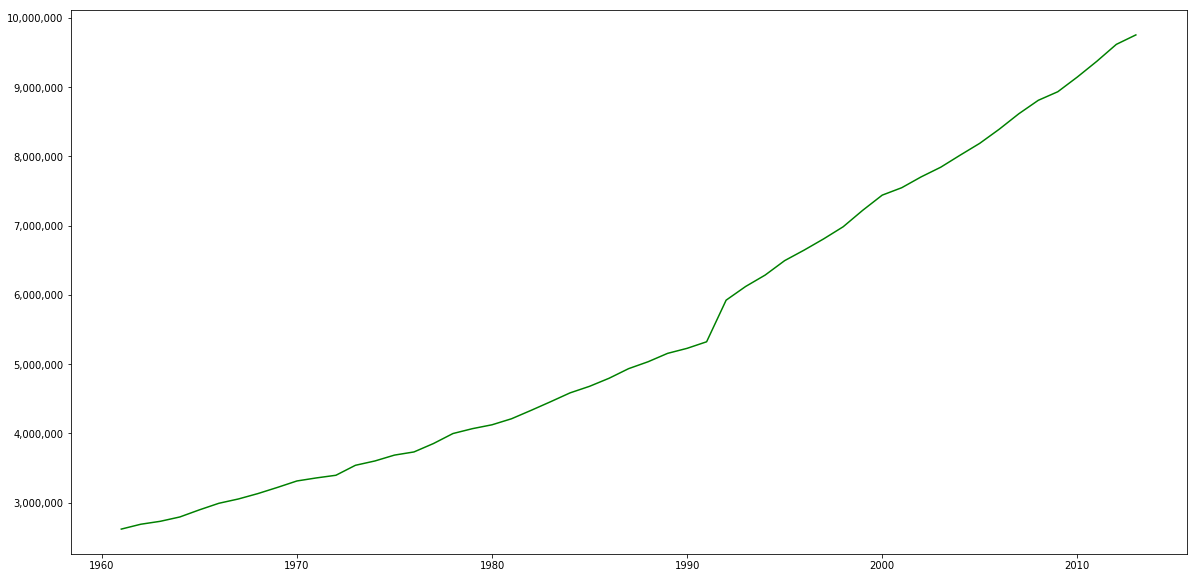

In [91]:
ax = plt.subplots(figsize = (20,10))
plt.plot(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

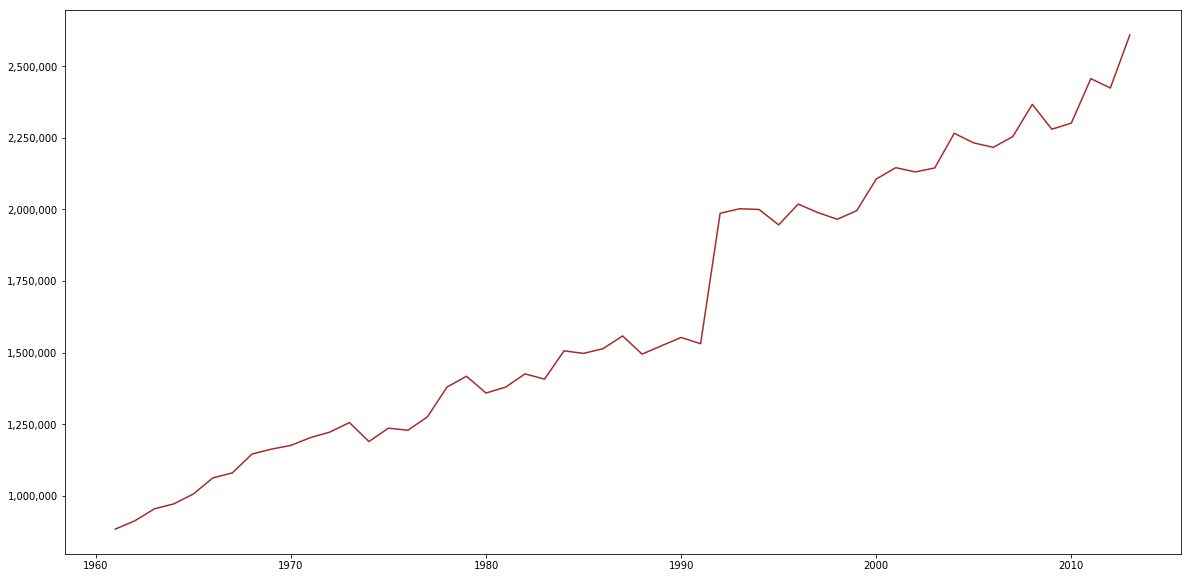

In [92]:
ax = plt.subplots(figsize = (20,10))
plt.plot(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

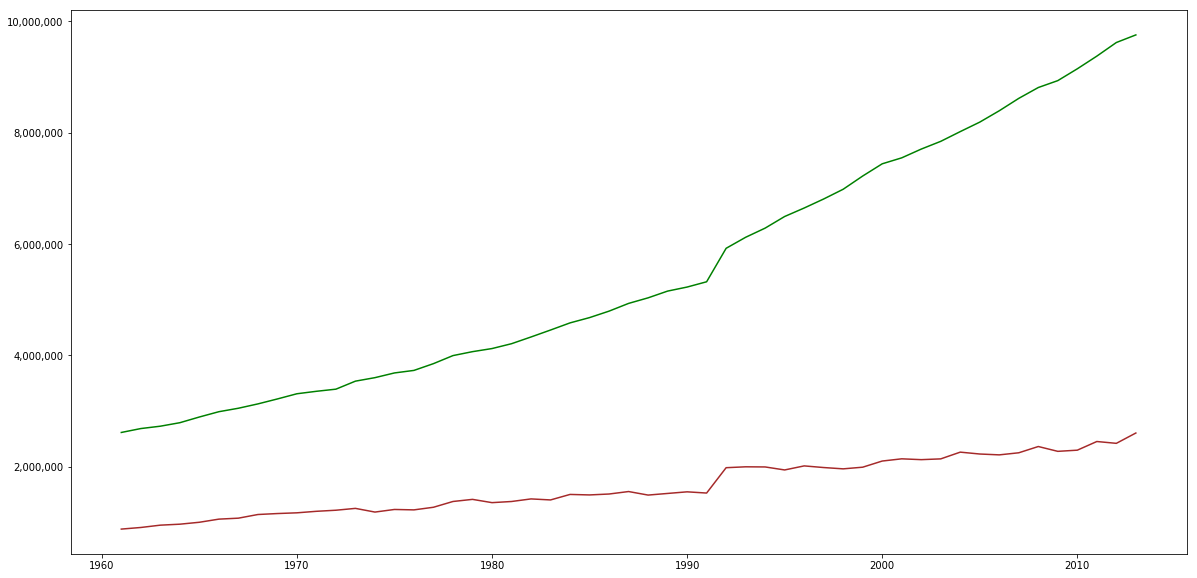

In [93]:
ax = plt.subplots(figsize = (20,10))
plt.plot(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

Create linear models for these lines!

In [94]:
# Linear regression objects
regression_fo = linear_model.LinearRegression()
regression_fe = linear_model.LinearRegression()

In [95]:
# X and Y training values
X_train_fo = df_supply_fo_gr.Year.values.reshape(-1,1) # Reshape because we need 2D objects
X_train_fe = df_supply_fe_gr.Year.values.reshape(-1,1)

Y_train_fo = df_supply_fo_gr.Supply1000Tonnes.values
Y_train_fe = df_supply_fe_gr.Supply1000Tonnes.values

In [96]:
# Training process
regression_fo.fit(X_train_fo, Y_train_fo)
regression_fe.fit(X_train_fe, Y_train_fe)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [97]:
# predictions
Pred_fo = regression_fo.predict(X_train_fo)
Pred_fe = regression_fe.predict(X_train_fe)

As we can see, tha predictions are totally wrong. This is we need to consider that line changing growth. So I am going to calculate new models that consider this fact.

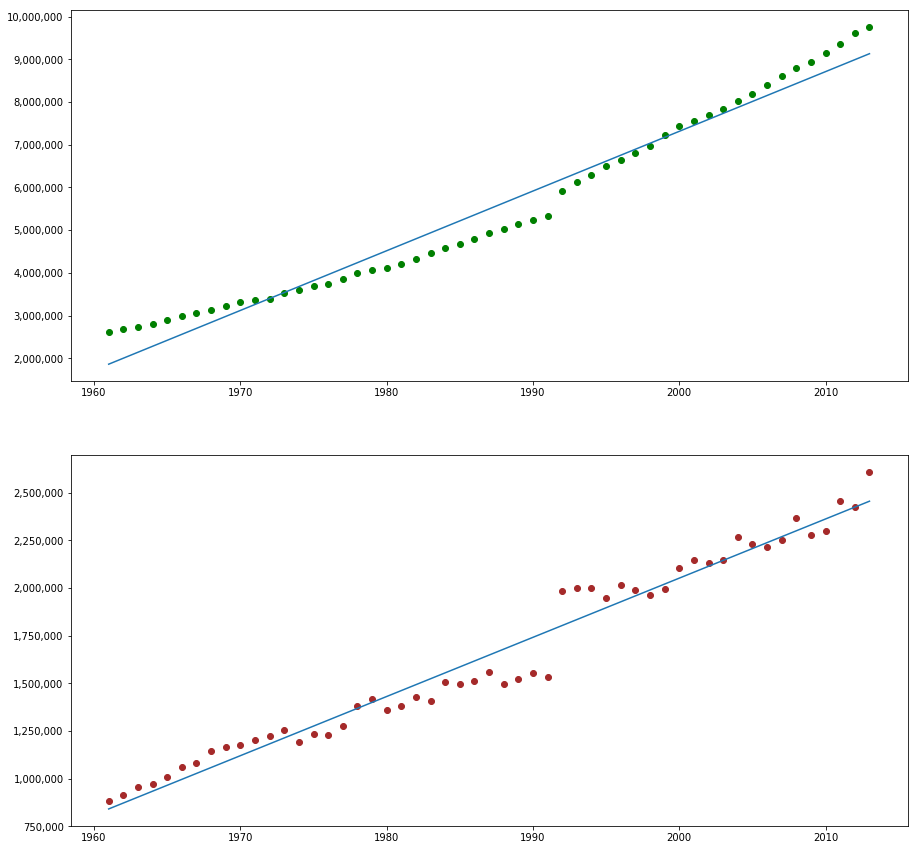

In [98]:
#Creating new figure
f, axs = plt.subplots(2,2,figsize=(15,15)) #Creating new figure

# First plot
plt.subplot(2,1,1)
plt.scatter(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo, Pred_fo)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



# Second plot
plt.subplot(2,1,2)
plt.scatter(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe, Pred_fe)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

In [99]:
#Create linear models for the values before 1992
reg_fo_before = linear_model.LinearRegression()
reg_fe_before = linear_model.LinearRegression()

In [100]:
#Calculate differences between 1992 and 1991
diff_fe = df_supply_fe_gr[df_supply_fe_gr["Year"] == 1992].Supply1000Tonnes - \
    df_supply_fe_gr[df_supply_fe_gr["Year"] == 1991].Supply1000Tonnes
    
diff_fo = df_supply_fo_gr[df_supply_fo_gr["Year"] == 1992].Supply1000Tonnes - \
df_supply_fo_gr[df_supply_fo_gr["Year"] == 1991].Supply1000Tonnes

In [101]:
# X and Y training values
X_train_fo_before = df_supply_fo_gr[df_supply_fo_gr["Year"] <1992].Year.values.reshape(-1,1) # Reshape because we need 2D objects
X_train_fe_before = df_supply_fe_gr[df_supply_fe_gr["Year"] <1992].Year.values.reshape(-1,1)

Y_train_fo_before = df_supply_fo_gr[df_supply_fo_gr["Year"] <1992].Supply1000Tonnes.values
Y_train_fe_before = df_supply_fe_gr[df_supply_fe_gr["Year"] <1992].Supply1000Tonnes.values

In [102]:
# Training process
reg_fo_before.fit(X_train_fo_before, Y_train_fo_before)
reg_fe_before.fit(X_train_fe_before, Y_train_fe_before)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
# predictions
Pred_fo_before = reg_fo_before.predict(X_train_fo_before)
Pred_fe_before = reg_fe_before.predict(X_train_fe_before)

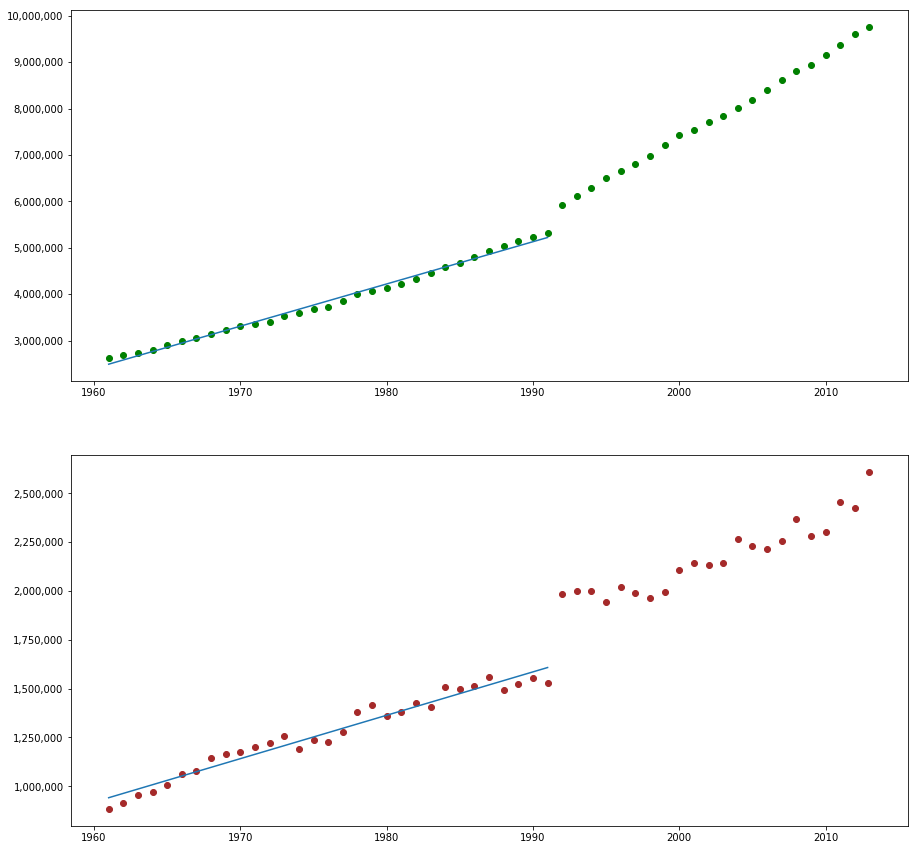

In [104]:
#Creating new figure
f, axs = plt.subplots(2,2,figsize=(15,15)) #Creating new figure

# First plot
plt.subplot(2,1,1)
plt.scatter(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo_before, Pred_fo_before)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



# Second plot
plt.subplot(2,1,2)
plt.scatter(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe_before, Pred_fe_before)
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

In [105]:
# Predict values for 1992
predicted_fo_1992 = reg_fo_before.predict(1992)
predicted_fe_1992 = reg_fe_before.predict(1992)

predicted_fo_1992

array([5312201.28387094])

In [106]:
# Offset (real value - predicted) (1992)
offset_fo = df_supply_fo_gr[df_supply_fo_gr["Year"] == 1992].Supply1000Tonnes - predicted_fo_1992
offset_fe = df_supply_fe_gr[df_supply_fe_gr["Year"] == 1992].Supply1000Tonnes - predicted_fe_1992

offset_fo

31    611081.716129
Name: Supply1000Tonnes, dtype: float64

In [107]:
# Copy the datasets
df_supply_fo_gr_smooth = df_supply_fo_gr.copy()
df_supply_fe_gr_smooth = df_supply_fe_gr.copy()

In [108]:
# Add the offset to the first part of the dataset
df_supply_fo_gr_smooth["Supply1000Tonnes"] = \
    df_supply_fo_gr_smooth.apply\
    (lambda x: x["Supply1000Tonnes"] + offset_fo if x["Year"] < 1992 \
     else x["Supply1000Tonnes"], axis = 1)
    
    
df_supply_fe_gr_smooth["Supply1000Tonnes"] = \
    df_supply_fe_gr.apply\
    (lambda x: x["Supply1000Tonnes"] + offset_fe if x["Year"] < 1992 \
     else x["Supply1000Tonnes"], axis = 1)

In [109]:
df_supply_fo_gr_smooth.head()

,Year,Supply1000Tonnes
0,1961,3.229379e+06
1,1962,3.299516e+06
2,1963,3.341854e+06
3,1964,3.404433e+06
4,1965,3.506823e+06


Here are the plots without the big growth. I am going to apply 3 models on each chart. A linear model, a polynomial which is trained on the smooth dataset and another polynomial which is trained only the second part of the original dataset, splitted by year 1992.

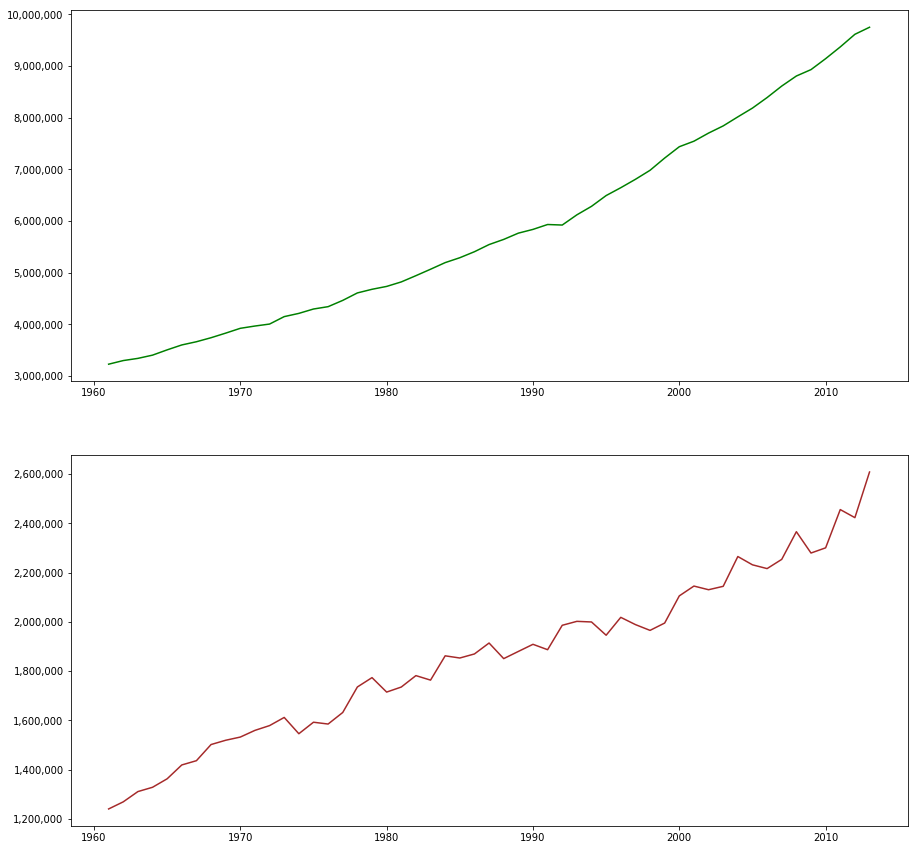

In [110]:
#Creating new figure
f, axs = plt.subplots(2,2,figsize=(15,15)) #Creating new figure

# First plot
plt.subplot(2,1,1)
plt.plot(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



# Second plot
plt.subplot(2,1,2)
plt.plot(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

In [111]:
# LINEAR MODEL

# Linear regression objects
regression_fo_lin = linear_model.LinearRegression()
regression_fe_lin = linear_model.LinearRegression()

# X and Y training values
X_train_fo_lin = df_supply_fo_gr_smooth.Year.values.reshape(-1,1) #Reshape because we need 2D objects
X_train_fe_lin = df_supply_fe_gr_smooth.Year.values.reshape(-1,1)

Y_train_fo_lin = df_supply_fo_gr_smooth.Supply1000Tonnes.values
Y_train_fe_lin = df_supply_fe_gr_smooth.Supply1000Tonnes.values

# Training process
regression_fo_lin.fit(X_train_fo_lin, Y_train_fo_lin)
regression_fe_lin.fit(X_train_fe_lin, Y_train_fe_lin)

# Predictions
Pred_fo_lin = regression_fo_lin.predict(X_train_fo_lin)
Pred_fe_lin = regression_fe_lin.predict(X_train_fe_lin)

In [112]:
# Initialize polynomial feature maker obj
poly = PolynomialFeatures(degree = 3)

In [113]:
# Polynomial FOR THE WHOLE DATASET




# Linear regression objects
regression_fo_pol_who = linear_model.LinearRegression()
regression_fe_pol_who = linear_model.LinearRegression()

# X and Y training values
X_train_fo_pol_who = df_supply_fo_gr_smooth.Year.values.reshape(-1,1) #Reshape because we need 2D objects
X_train_fe_pol_who = df_supply_fe_gr_smooth.Year.values.reshape(-1,1)

Y_train_fo_pol_who = df_supply_fo_gr_smooth.Supply1000Tonnes.values
Y_train_fe_pol_who = df_supply_fe_gr_smooth.Supply1000Tonnes.values

# Transform the X into a polynomial set
X_train_fo_pol_who_tra = poly.fit_transform(X_train_fo_pol_who)
X_train_fe_pol_who_tra = poly.fit_transform(X_train_fe_pol_who)

# Training process
regression_fo_pol_who.fit(X_train_fo_pol_who_tra, Y_train_fo_pol_who)
regression_fe_pol_who.fit(X_train_fe_pol_who_tra, Y_train_fe_pol_who)

# Predictions
Pred_fo_pol_who = regression_fo_pol_who.predict(X_train_fo_pol_who_tra)
Pred_fe_pol_who = regression_fe_pol_who.predict(X_train_fe_pol_who_tra)

In [114]:
# Polynomial FOR DATA WITH year >= 1992

# Linear regression objects
regression_fo_pol_sec = linear_model.LinearRegression()
regression_fe_pol_sec = linear_model.LinearRegression()

# X and Y training values
X_train_fo_pol_sec = df_supply_fo_gr_smooth[df_supply_fo_gr_smooth["Year"] >= 1992].Year.values.reshape(-1,1) #Reshape because we need 2D objects
X_train_fe_pol_sec = df_supply_fe_gr_smooth[df_supply_fo_gr_smooth["Year"] >= 1992].Year.values.reshape(-1,1)

Y_train_fo_pol_sec = df_supply_fo_gr_smooth[df_supply_fo_gr_smooth["Year"] >= 1992].Supply1000Tonnes.values
Y_train_fe_pol_sec = df_supply_fe_gr_smooth[df_supply_fo_gr_smooth["Year"] >= 1992].Supply1000Tonnes.values

# Transform the X into a polynomial set
X_train_fo_pol_sec_tra = poly.fit_transform(X_train_fo_pol_sec)
X_train_fe_pol_sec_tra = poly.fit_transform(X_train_fe_pol_sec)

# Training process
regression_fo_pol_sec.fit(X_train_fo_pol_sec_tra, Y_train_fo_pol_sec)
regression_fe_pol_sec.fit(X_train_fe_pol_sec_tra, Y_train_fe_pol_sec)

# Predictions
Pred_fo_pol_sec = regression_fo_pol_sec.predict(X_train_fo_pol_sec_tra)
Pred_fe_pol_sec = regression_fe_pol_sec.predict(X_train_fe_pol_sec_tra)

It is really hard to see which line goes where because they are running on each other. I am going to separate them into different charts.

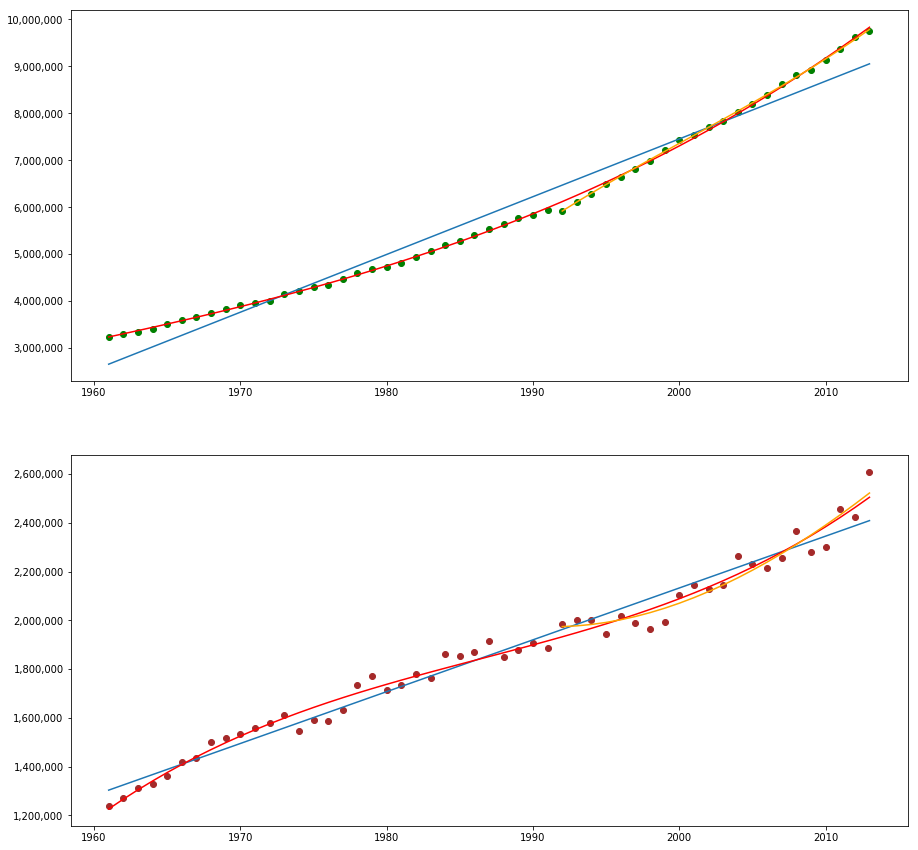

In [115]:
#Creating new figure
f, axs = plt.subplots(2,2,figsize=(15,15)) #Creating new figure

# First plot
plt.subplot(2,1,1)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo_lin, Pred_fo_lin) # Linera Model
plt.plot(X_train_fo_pol_who, Pred_fo_pol_who, color = "red") # Polynomial Model on trained on the whole
plt.plot(X_train_fo_pol_sec, Pred_fo_pol_sec, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



# Second plot
plt.subplot(2,1,2)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe_lin, Pred_fe_lin) # Linera Model
plt.plot(X_train_fe_pol_who, Pred_fe_pol_who, color = "red") # Polynomial Model on trained on the whole
plt.plot(X_train_fe_pol_sec, Pred_fe_pol_sec, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

Much better!

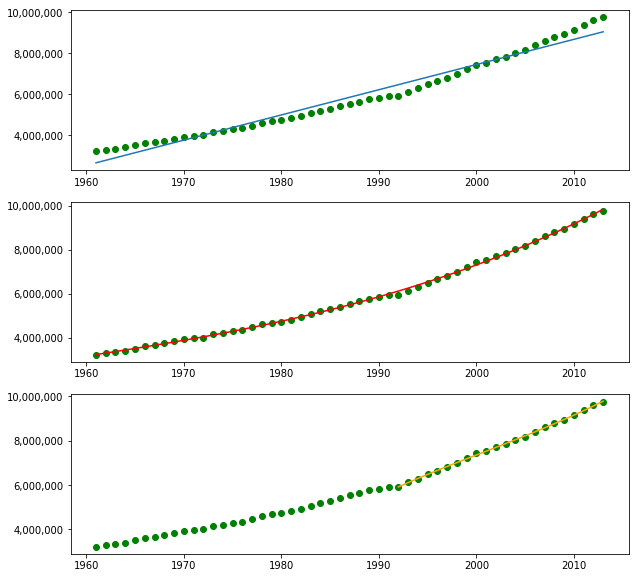

In [116]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(10,10)) #Creating new figure

# First plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo_lin, Pred_fo_lin) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo_pol_who, Pred_fo_pol_who, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_train_fo_pol_sec, Pred_fo_pol_sec, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



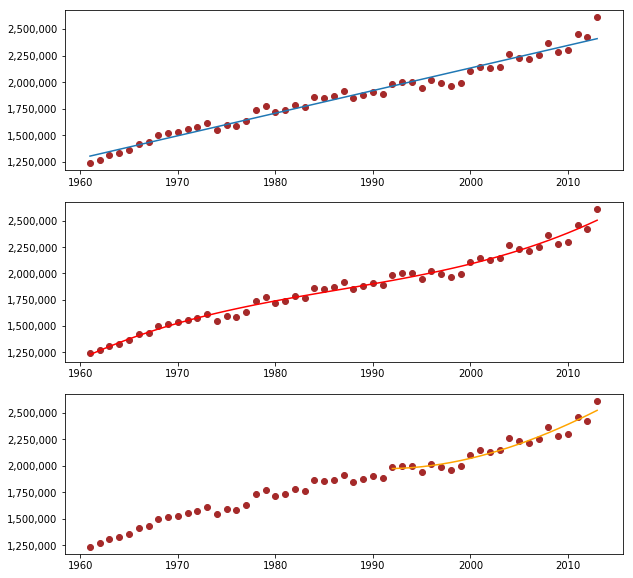

In [117]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(10,10)) #Creating new figure

# Second plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe_lin, Pred_fe_lin) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe_pol_who, Pred_fe_pol_who, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_train_fe_pol_sec, Pred_fe_pol_sec, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

I want to see these lines from 1900 to 2050 because on this little interval it is hard to decide from where do the lines come from and where they go.

In [118]:
# From and To intervals
_from = 1900
_to = 2050

In [119]:
# Create an initial array for the test_x
X_test = np.arange(_to - _from +1)
X_test

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150])

In [120]:
# Corrigate the X_test to be the real numbers we are curioused about
X_test = X_test + 1900
X_test

array([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910,
       1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921,
       1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042,
       2043, 2044, 2045, 2046, 2047, 2048, 2049, 20

In [121]:
# Reshape dataset, because it is now a 1D dataset and we need 2D
X_test = X_test.reshape(-1, 1)
X_test

array([[1900],
       [1901],
       [1902],
       [1903],
       [1904],
       [1905],
       [1906],
       [1907],
       [1908],
       [1909],
       [1910],
       [1911],
       [1912],
       [1913],
       [1914],
       [1915],
       [1916],
       [1917],
       [1918],
       [1919],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1930],
       [1931],
       [1932],
       [1933],
       [1934],
       [1935],
       [1936],
       [1937],
       [1938],
       [1939],
       [1940],
       [1941],
       [1942],
       [1943],
       [1944],
       [1945],
       [1946],
       [1947],
       [1948],
       [1949],
       [1950],
       [1951],
       [1952],
       [1953],
       [1954],
       [1955],
       [1956],
       [1957],
       [1958],
       [1959],
       [1960],
       [1961],
       [1962],
       [1963],
       [1964],
       [1965],
       [19

In [122]:
# Create polynomial X set for the polynomial models
X_test_pol = poly.fit_transform(X_test)

In [123]:
# Predictions

#Linear
pred_fo_lin_test = regression_fo_lin.predict(X_test)
pred_fe_lin_test = regression_fe_lin.predict(X_test)

#Polynomial Whole
pred_fo_pol_who_test = regression_fo_pol_who.predict(X_test_pol)
pred_fe_pol_who_test = regression_fe_pol_who.predict(X_test_pol)

#Polynomial Second Part
pred_fo_pol_sec_test = regression_fo_pol_sec.predict(X_test_pol)
pred_fe_pol_sec_test = regression_fe_pol_sec.predict(X_test_pol)

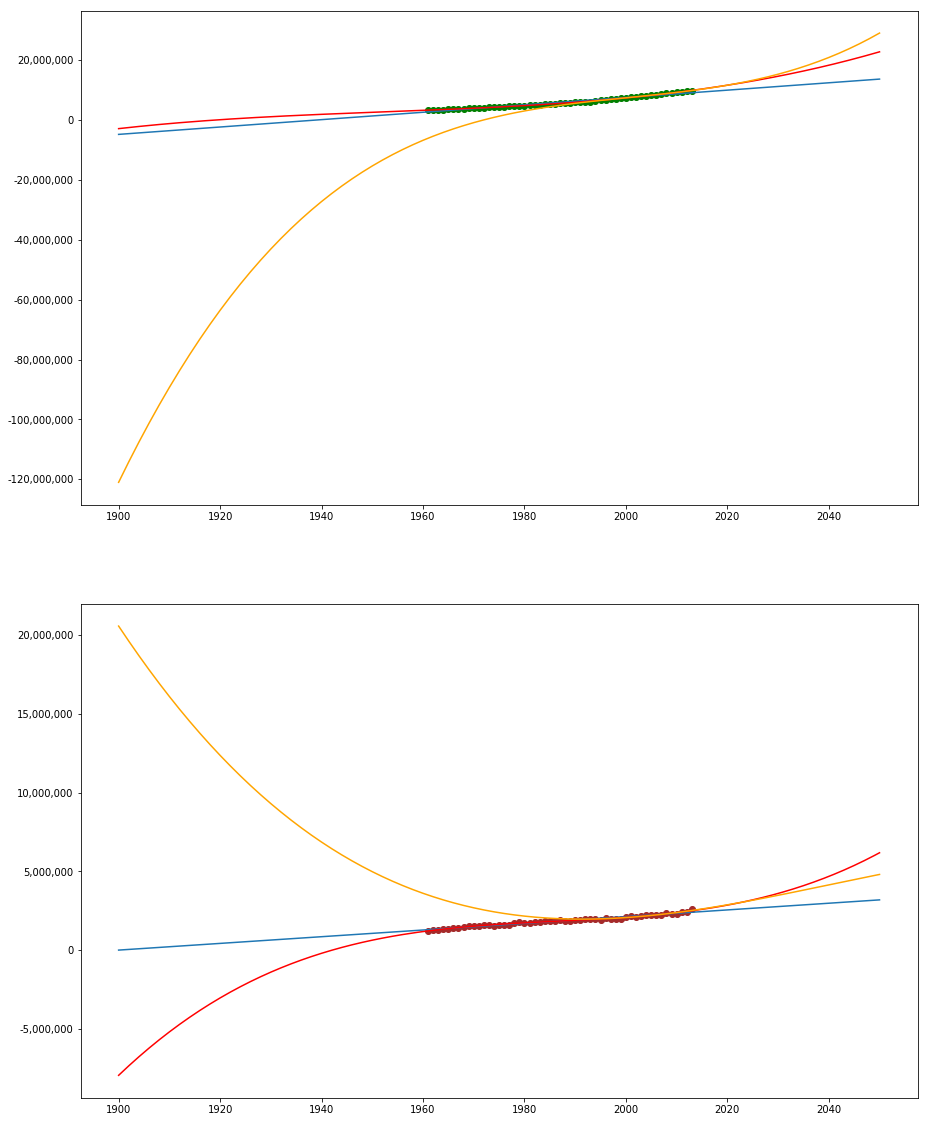

In [124]:
#Creating new figure
f, axs = plt.subplots(2,2,figsize=(15,20)) #Creating new figure

# First plot
plt.subplot(2,1,1)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_lin_test) # Linera Model
plt.plot(X_test, pred_fo_pol_who_test, color = "red") # Polynomial Model on trained on the whole
plt.plot(X_test, pred_fo_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values



# Second plot
plt.subplot(2,1,2)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_lin_test) # Linera Model
plt.plot(X_test, pred_fe_pol_who_test, color = "red") # Polynomial Model on trained on the whole
plt.plot(X_test, pred_fe_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

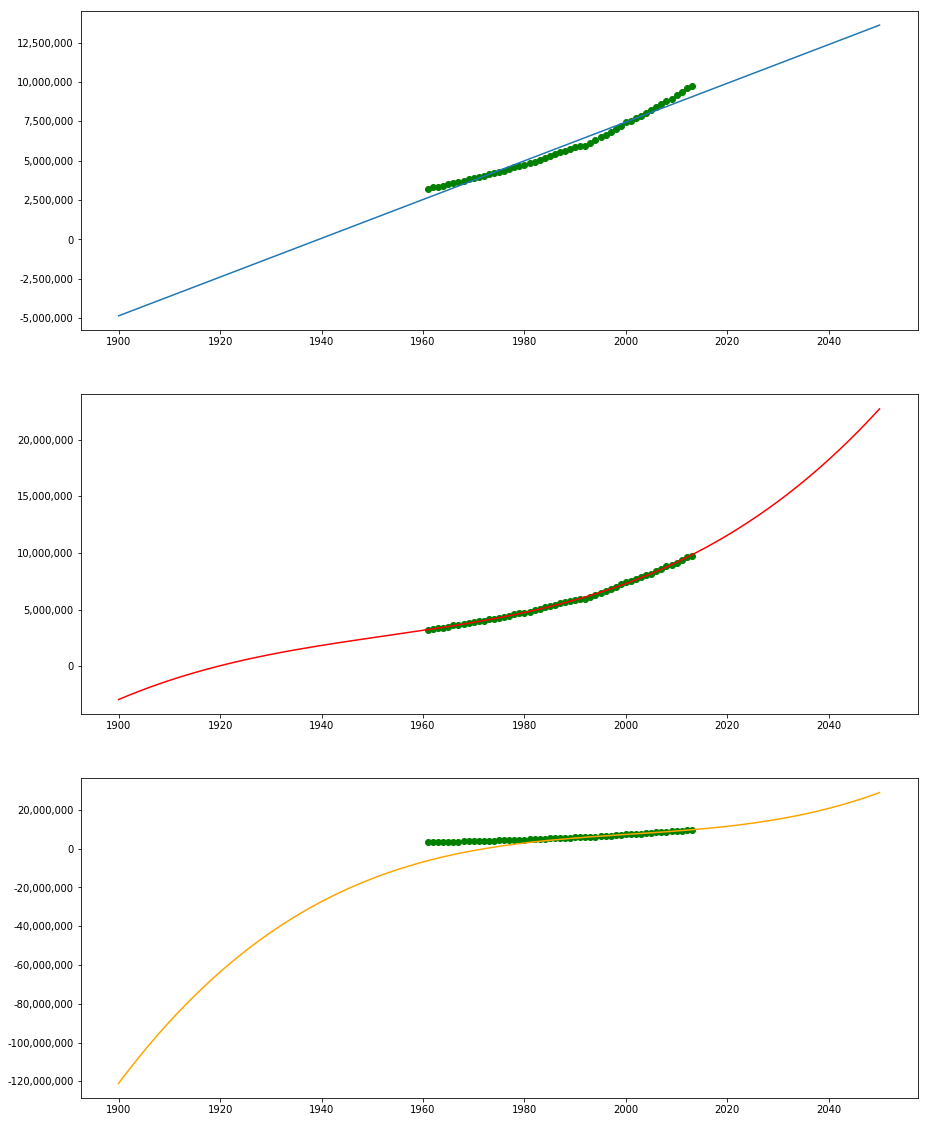

In [125]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(15,20)) #Creating new figure

# First plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_lin_test) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_pol_who_test, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fo_gr_smooth.Year, df_supply_fo_gr_smooth.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values


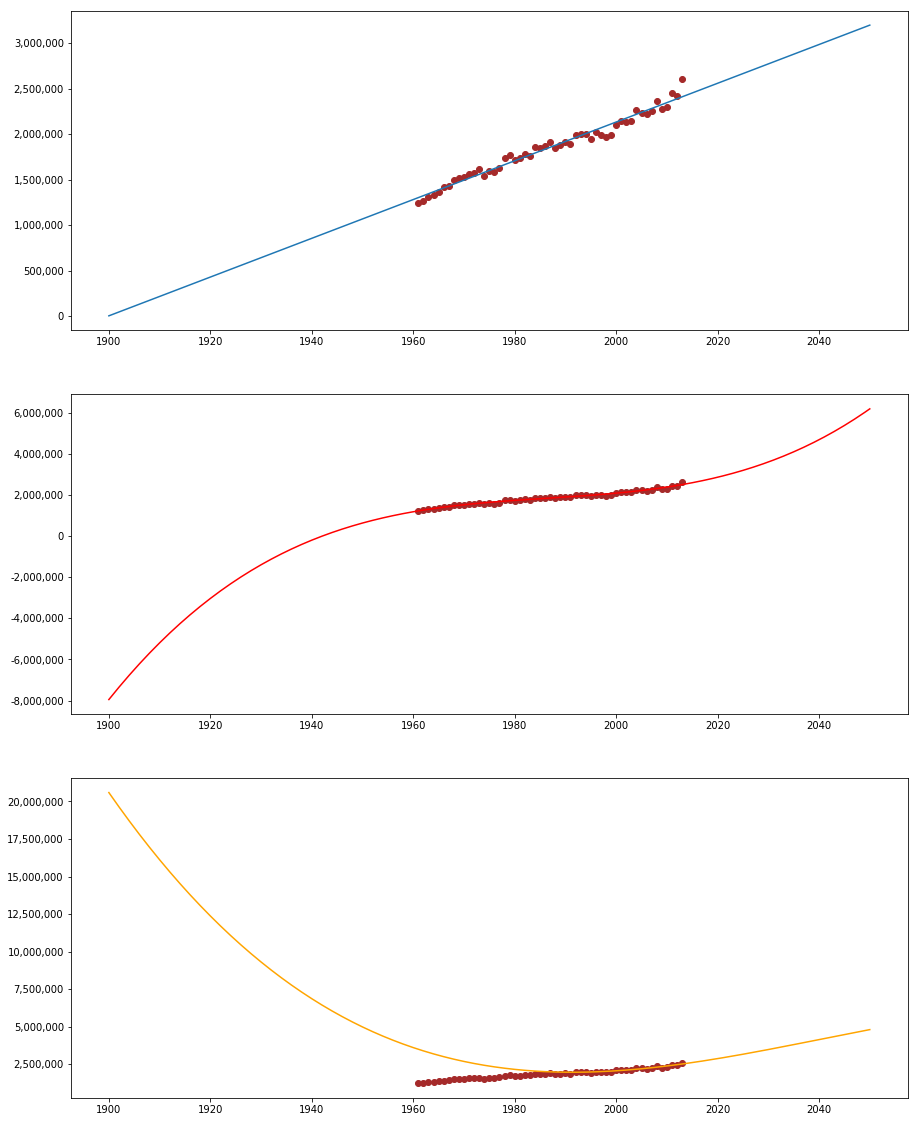

In [126]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(15,20)) #Creating new figure

# Second plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_lin_test) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_pol_who_test, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fe_gr_smooth.Year, df_supply_fe_gr_smooth.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

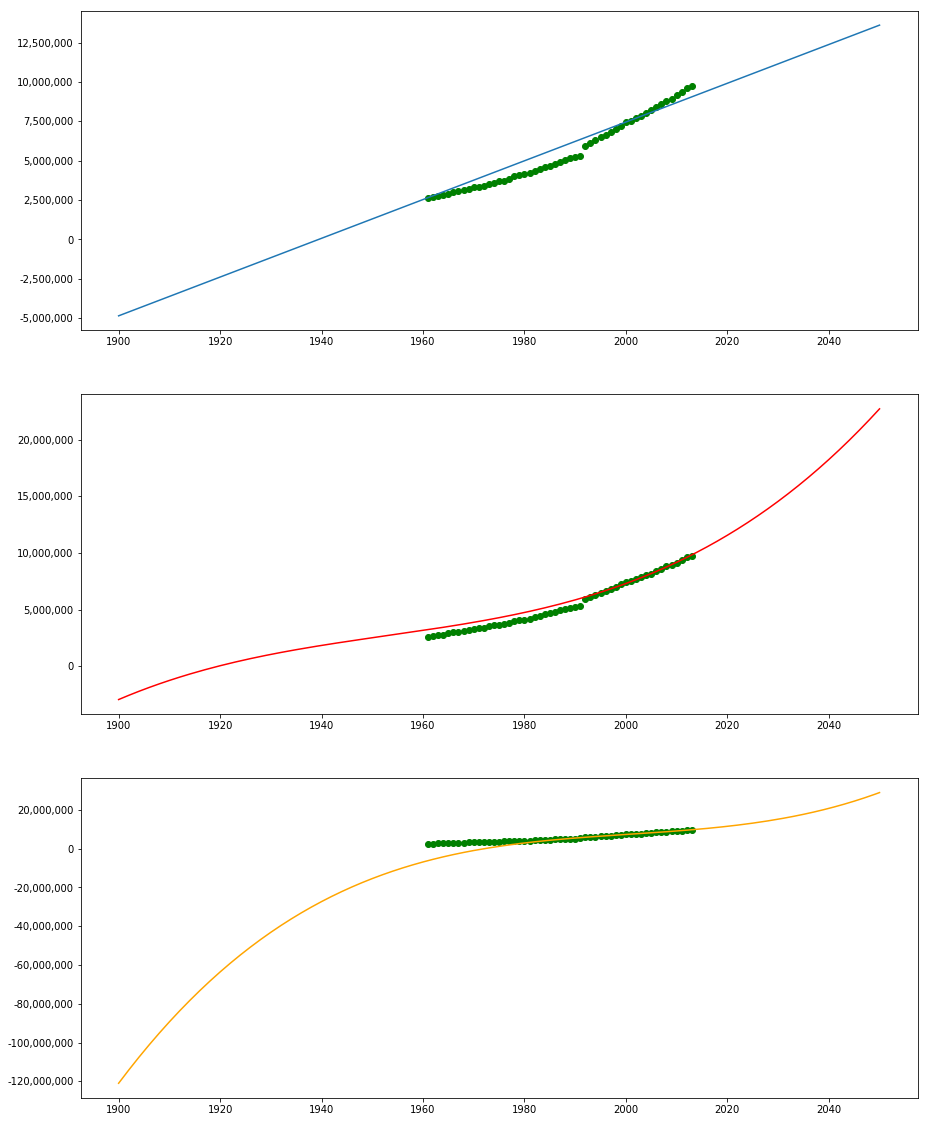

In [127]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(15,20)) #Creating new figure

# First plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_lin_test) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_pol_who_test, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# First plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fo_gr.Year, df_supply_fo_gr.Supply1000Tonnes, color = "green")
plt.plot(X_test, pred_fo_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

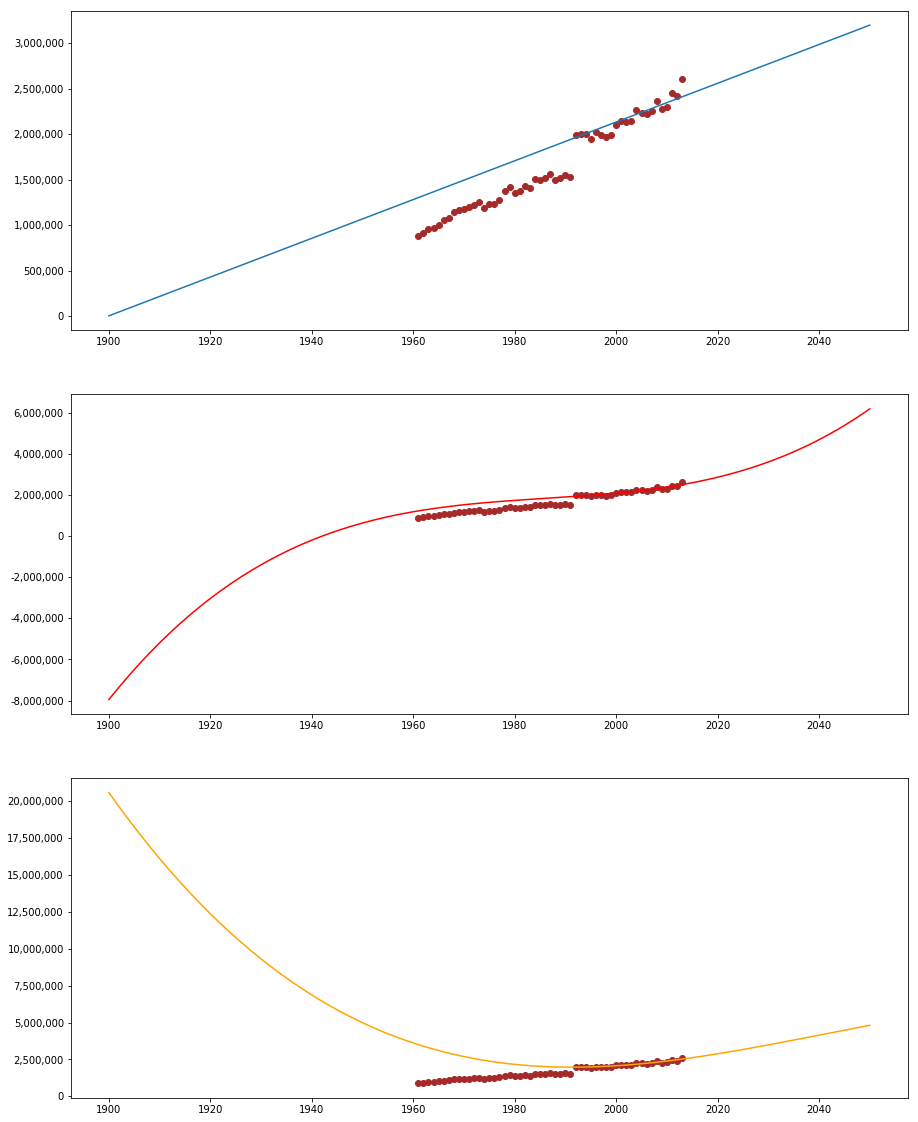

In [128]:
#Creating new figure
f, axs = plt.subplots(3,2,figsize=(15,20)) #Creating new figure

# Second plot
plt.subplot(3,1,1)
plt.scatter(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_lin_test) # Linera Model
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,2)
plt.scatter(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_pol_who_test, color = "red") # Polynomial Model on trained on the whole
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

# Second plot
plt.subplot(3,1,3)
plt.scatter(df_supply_fe_gr.Year, df_supply_fe_gr.Supply1000Tonnes, color = "brown")
plt.plot(X_test, pred_fe_pol_sec_test, color = "orange") # Polynomial Model on trained on the second part
ax = plt.gca()
ax.ticklabel_format(useOffset=False, style='plain') # Prevent scientific notation
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) #Comma separated values

In [129]:
df

,SupplyId,Area,Item,Element
0,1,Afghanistan,Wheat and products,Food
1,2,Afghanistan,Rice (Milled Equivalent),Food
2,3,Afghanistan,Barley and products,Feed
3,4,Afghanistan,Barley and products,Food
4,5,Afghanistan,Maize and products,Feed
5,6,Afghanistan,Maize and products,Food
6,7,Afghanistan,Millet and products,Food
7,8,Afghanistan,"Cereals, Other",Food
8,9,Afghanistan,Potatoes and products,Food
9,10,Afghanistan,Sugar cane,Feed


###  Production by wrapping down to Year and Item

In [130]:
df_supply

,SupplyId,Year,Supply1000Tonnes
0,1,1961,1928.0
1,2,1961,183.0
2,3,1961,76.0
3,4,1961,237.0
4,5,1961,210.0
5,6,1961,403.0
6,7,1961,17.0
7,8,1961,0.0
8,9,1961,111.0
9,10,1961,45.0


In [131]:
# Merge columns
df_me = pd.merge(df_supply, df, how = "inner", on=['SupplyId']).drop(["Area", "Element", "SupplyId"], axis = 1)

In [132]:
df_me_gr = df_me.groupby(['Item','Year'], axis = 0, as_index = False)['Supply1000Tonnes'].sum()

The only problem in this heatmap is there are some values that way higher than the vast majority of the data. So what we need is to calculate the percentage compared to 1961 in every year.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5]),
 <a list of 53 Text xticklabel objects>)

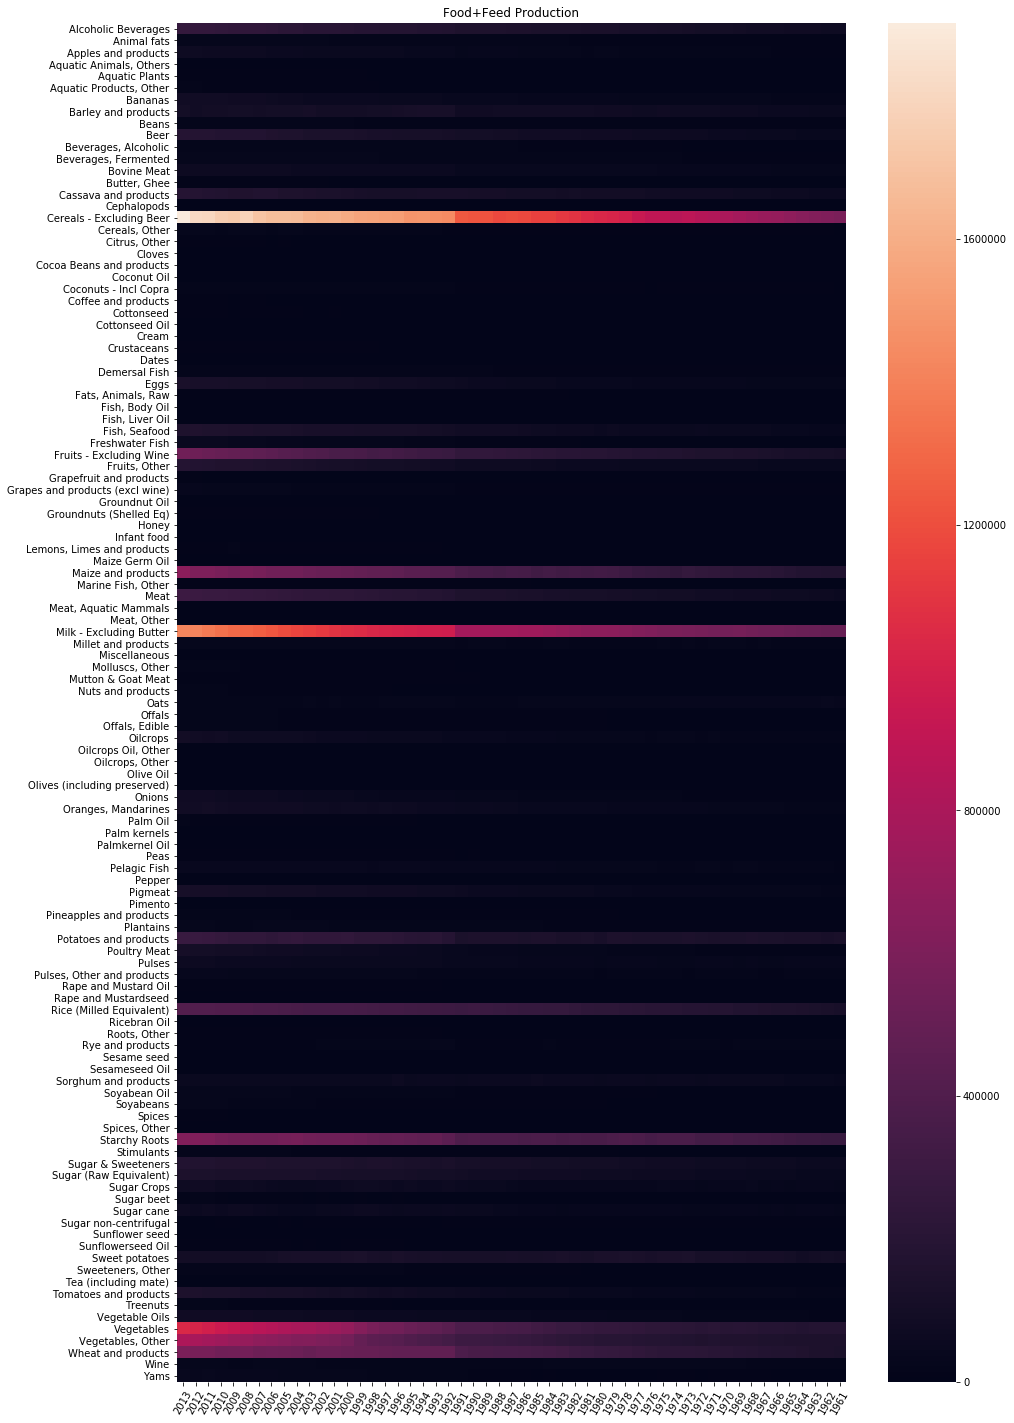

In [168]:
f, axs = plt.subplots(1,1,figsize=(15,25))
ax = sns.heatmap(df_me_gr.pivot("Item", "Year", "Supply1000Tonnes"))

ax.set_title("Food+Feed Production")

# Invert X Axis
ax.invert_xaxis()

# Remove Titles
ax.set_ylabel('')    
ax.set_xlabel('')

# Rotate X Labels
plt.xticks(rotation=60)

In [134]:
# Filter and group by
df_me_gr_1961 = df_me[df_me["Year"] == 1961].groupby(['Item','Year'], axis = 0, as_index = False)['Supply1000Tonnes'].sum()

In [135]:
# Filter
df_1961_filtered = df_me_gr_1961[df_me_gr_1961["Supply1000Tonnes"] > 1000]

In [136]:
df_1961_filtered

,Item,Year,Supply1000Tonnes
0,Alcoholic Beverages,1961,69924.0
1,Animal fats,1961,10359.0
2,Apples and products,1961,10833.0
6,Bananas,1961,16623.0
7,Barley and products,1961,46180.0
8,Beans,1961,9105.0
9,Beer,1961,37589.0
10,"Beverages, Alcoholic",1961,3934.0
11,"Beverages, Fermented",1961,9044.0
12,Bovine Meat,1961,24844.0


In [137]:
# Filter
df_heatmap = df_me[df_me["Item"].isin(df_1961_filtered.Item)]

In [138]:
df_heatmap = df_heatmap.groupby(['Item','Year'], axis = 0, as_index = False)['Supply1000Tonnes'].sum()

In [139]:
df_heatmap

,Item,Year,Supply1000Tonnes
0,Alcoholic Beverages,1961,69924.0
1,Alcoholic Beverages,1962,72447.0
2,Alcoholic Beverages,1963,75105.0
3,Alcoholic Beverages,1964,77976.0
4,Alcoholic Beverages,1965,80127.0
5,Alcoholic Beverages,1966,83660.0
6,Alcoholic Beverages,1967,86095.0
7,Alcoholic Beverages,1968,89075.0
8,Alcoholic Beverages,1969,92729.0
9,Alcoholic Beverages,1970,97789.0


In [140]:
# Divide by the base year's number
df_heatmap["Supply1000Tonnes"] = df_heatmap.apply\
    (lambda x: x["Supply1000Tonnes"] / \
     df_1961_filtered[df_1961_filtered["Item"] == x["Item"]].Supply1000Tonnes.values,\
     axis = 1)
df_heatmap

,Item,Year,Supply1000Tonnes
0,Alcoholic Beverages,1961,1.000000
1,Alcoholic Beverages,1962,1.036082
2,Alcoholic Beverages,1963,1.074095
3,Alcoholic Beverages,1964,1.115154
4,Alcoholic Beverages,1965,1.145916
5,Alcoholic Beverages,1966,1.196442
6,Alcoholic Beverages,1967,1.231265
7,Alcoholic Beverages,1968,1.273883
8,Alcoholic Beverages,1969,1.326140
9,Alcoholic Beverages,1970,1.398504


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5]),
 <a list of 53 Text xticklabel objects>)

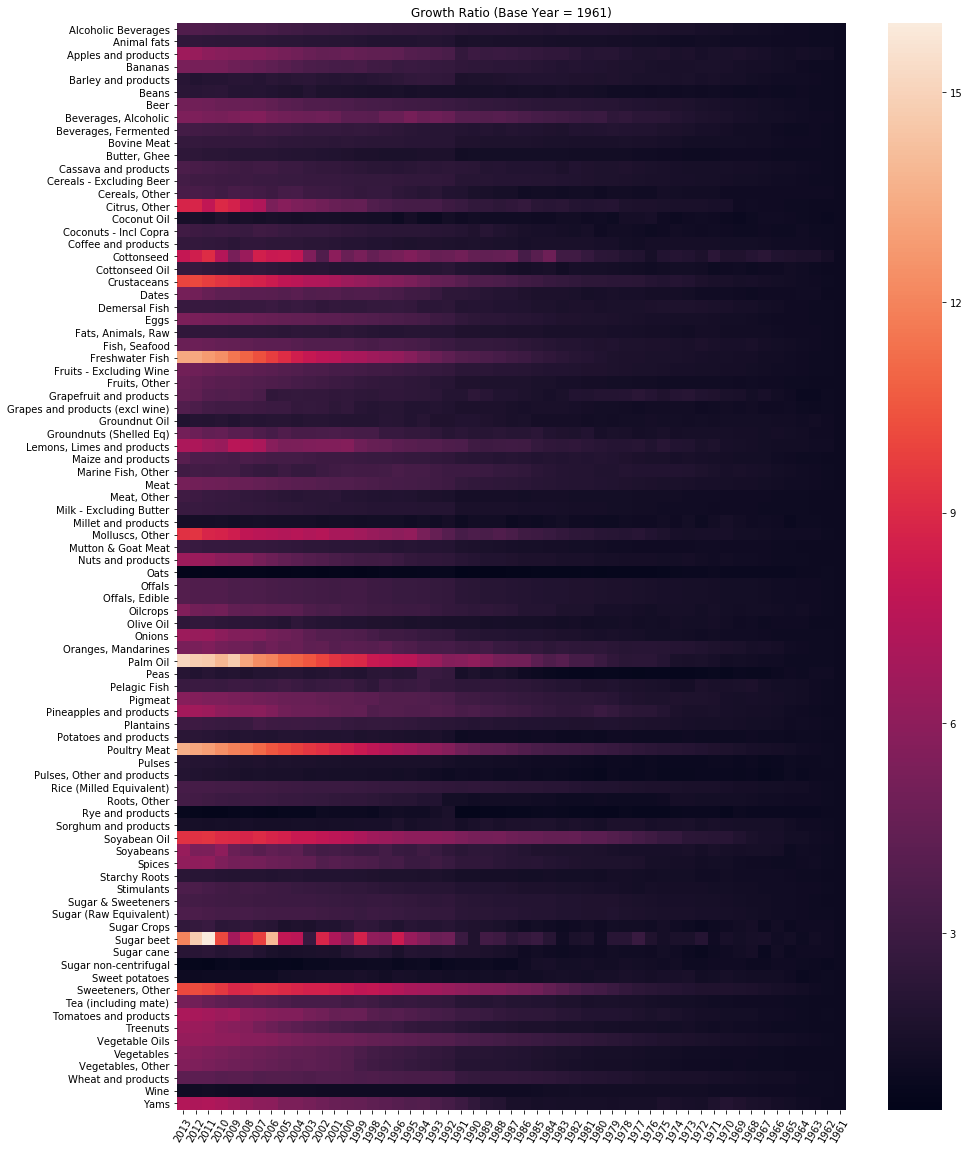

In [166]:
f, axs = plt.subplots(1,1,figsize=(15,20))
ax = sns.heatmap(df_heatmap.pivot("Item", "Year", "Supply1000Tonnes"))
ax.set_title("Growth Ratio (Base Year = 1961)")

# Invert X Axis
ax.invert_xaxis()

# Remove Titles
ax.set_ylabel('')    
ax.set_xlabel('')

# Rotate X Labels
plt.xticks(rotation=60)

In [142]:
df

,SupplyId,Area,Item,Element
0,1,Afghanistan,Wheat and products,Food
1,2,Afghanistan,Rice (Milled Equivalent),Food
2,3,Afghanistan,Barley and products,Feed
3,4,Afghanistan,Barley and products,Food
4,5,Afghanistan,Maize and products,Feed
5,6,Afghanistan,Maize and products,Food
6,7,Afghanistan,Millet and products,Food
7,8,Afghanistan,"Cereals, Other",Food
8,9,Afghanistan,Potatoes and products,Food
9,10,Afghanistan,Sugar cane,Feed


In [143]:
df_food_by_country = pd.merge(df, df_supply, how="inner", on=["SupplyId"]).drop(["Item", "SupplyId"], axis = 1)

In [144]:
df_food_by_country

,Area,Element,Year,Supply1000Tonnes
0,Afghanistan,Food,1961,1928.0
1,Afghanistan,Food,1962,1904.0
2,Afghanistan,Food,1963,1666.0
3,Afghanistan,Food,1964,1950.0
4,Afghanistan,Food,1965,2001.0
5,Afghanistan,Food,1966,1808.0
6,Afghanistan,Food,1967,2053.0
7,Afghanistan,Food,1968,2045.0
8,Afghanistan,Food,1969,2154.0
9,Afghanistan,Food,1970,1819.0


In [145]:
#Groupby
df_food_by_country_gr = \
    df_food_by_country.groupby \
    (axis = 0, as_index = False, \
     by=["Area", "Element", "Year"])["Supply1000Tonnes"].sum()

In [146]:
df_food_by_country_gr

,Area,Element,Year,Supply1000Tonnes
0,Afghanistan,Feed,1961,720.0
1,Afghanistan,Feed,1962,720.0
2,Afghanistan,Feed,1963,736.0
3,Afghanistan,Feed,1964,740.0
4,Afghanistan,Feed,1965,720.0
5,Afghanistan,Feed,1966,724.0
6,Afghanistan,Feed,1967,788.0
7,Afghanistan,Feed,1968,826.0
8,Afghanistan,Feed,1969,838.0
9,Afghanistan,Feed,1970,678.0


In [147]:
# Copy dataframe
df_fo_fe_ratio = df_food_by_country_gr.copy()

In [148]:
# Groupby to get 
df_fo_fe_ratio_gr = df_fo_fe_ratio.groupby\
    (['Area','Year', 'Element'])['Supply1000Tonnes'].aggregate('sum').unstack().reset_index()

In [149]:
df_fo_fe_ratio_gr

Element,Area,Year,Feed,Food
0,Afghanistan,1961,720.0,8761.0
1,Afghanistan,1962,720.0,8694.0
2,Afghanistan,1963,736.0,8458.0
3,Afghanistan,1964,740.0,9430.0
4,Afghanistan,1965,720.0,9753.0
5,Afghanistan,1966,724.0,9445.0
6,Afghanistan,1967,788.0,10501.0
7,Afghanistan,1968,826.0,10682.0
8,Afghanistan,1969,838.0,10977.0
9,Afghanistan,1970,678.0,9776.0


In [150]:
df_fo_fe = df_fo_fe_ratio_gr.copy()

In [151]:
df_fo_fe["IsFoodMore"] = df_fo_fe["Food"] > df_fo_fe["Feed"]
df_fo_fe

Element,Area,Year,Feed,Food,IsFoodMore
0,Afghanistan,1961,720.0,8761.0,True
1,Afghanistan,1962,720.0,8694.0,True
2,Afghanistan,1963,736.0,8458.0,True
3,Afghanistan,1964,740.0,9430.0,True
4,Afghanistan,1965,720.0,9753.0,True
5,Afghanistan,1966,724.0,9445.0,True
6,Afghanistan,1967,788.0,10501.0,True
7,Afghanistan,1968,826.0,10682.0,True
8,Afghanistan,1969,838.0,10977.0,True
9,Afghanistan,1970,678.0,9776.0,True


In [152]:
df_fo_fe.drop(["Food", "Feed"], axis = 1)

Element,Area,Year,IsFoodMore
0,Afghanistan,1961,True
1,Afghanistan,1962,True
2,Afghanistan,1963,True
3,Afghanistan,1964,True
4,Afghanistan,1965,True
5,Afghanistan,1966,True
6,Afghanistan,1967,True
7,Afghanistan,1968,True
8,Afghanistan,1969,True
9,Afghanistan,1970,True


In [154]:
df_fo_fe_ratio_gr = df_fo_fe_ratio_gr[(df_fo_fe_ratio_gr["Food"] != 0) & (df_fo_fe_ratio_gr["Feed"] != 0)]

In [155]:
df_fo_fe_ratio_gr["Ratio"] = df_fo_fe_ratio_gr["Food"] / df_fo_fe_ratio_gr["Feed"]

C:\Users\Ben\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [156]:
fo_fe_heatmap = df_fo_fe_ratio_gr.copy()

In [157]:
fo_fe_heatmap = df_fo_fe_ratio_gr.drop(["Food", "Feed"], axis = 1)

In [158]:
fo_fe_heatmap

Element,Area,Year,Ratio
0,Afghanistan,1961,12.168056
1,Afghanistan,1962,12.075000
2,Afghanistan,1963,11.491848
3,Afghanistan,1964,12.743243
4,Afghanistan,1965,13.545833
5,Afghanistan,1966,13.045580
6,Afghanistan,1967,13.326142
7,Afghanistan,1968,12.932203
8,Afghanistan,1969,13.099045
9,Afghanistan,1970,14.418879


The big values ruin the colorbar's function, so I am going to apply a logarithmic scale

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5]),
 <a list of 53 Text xticklabel objects>)

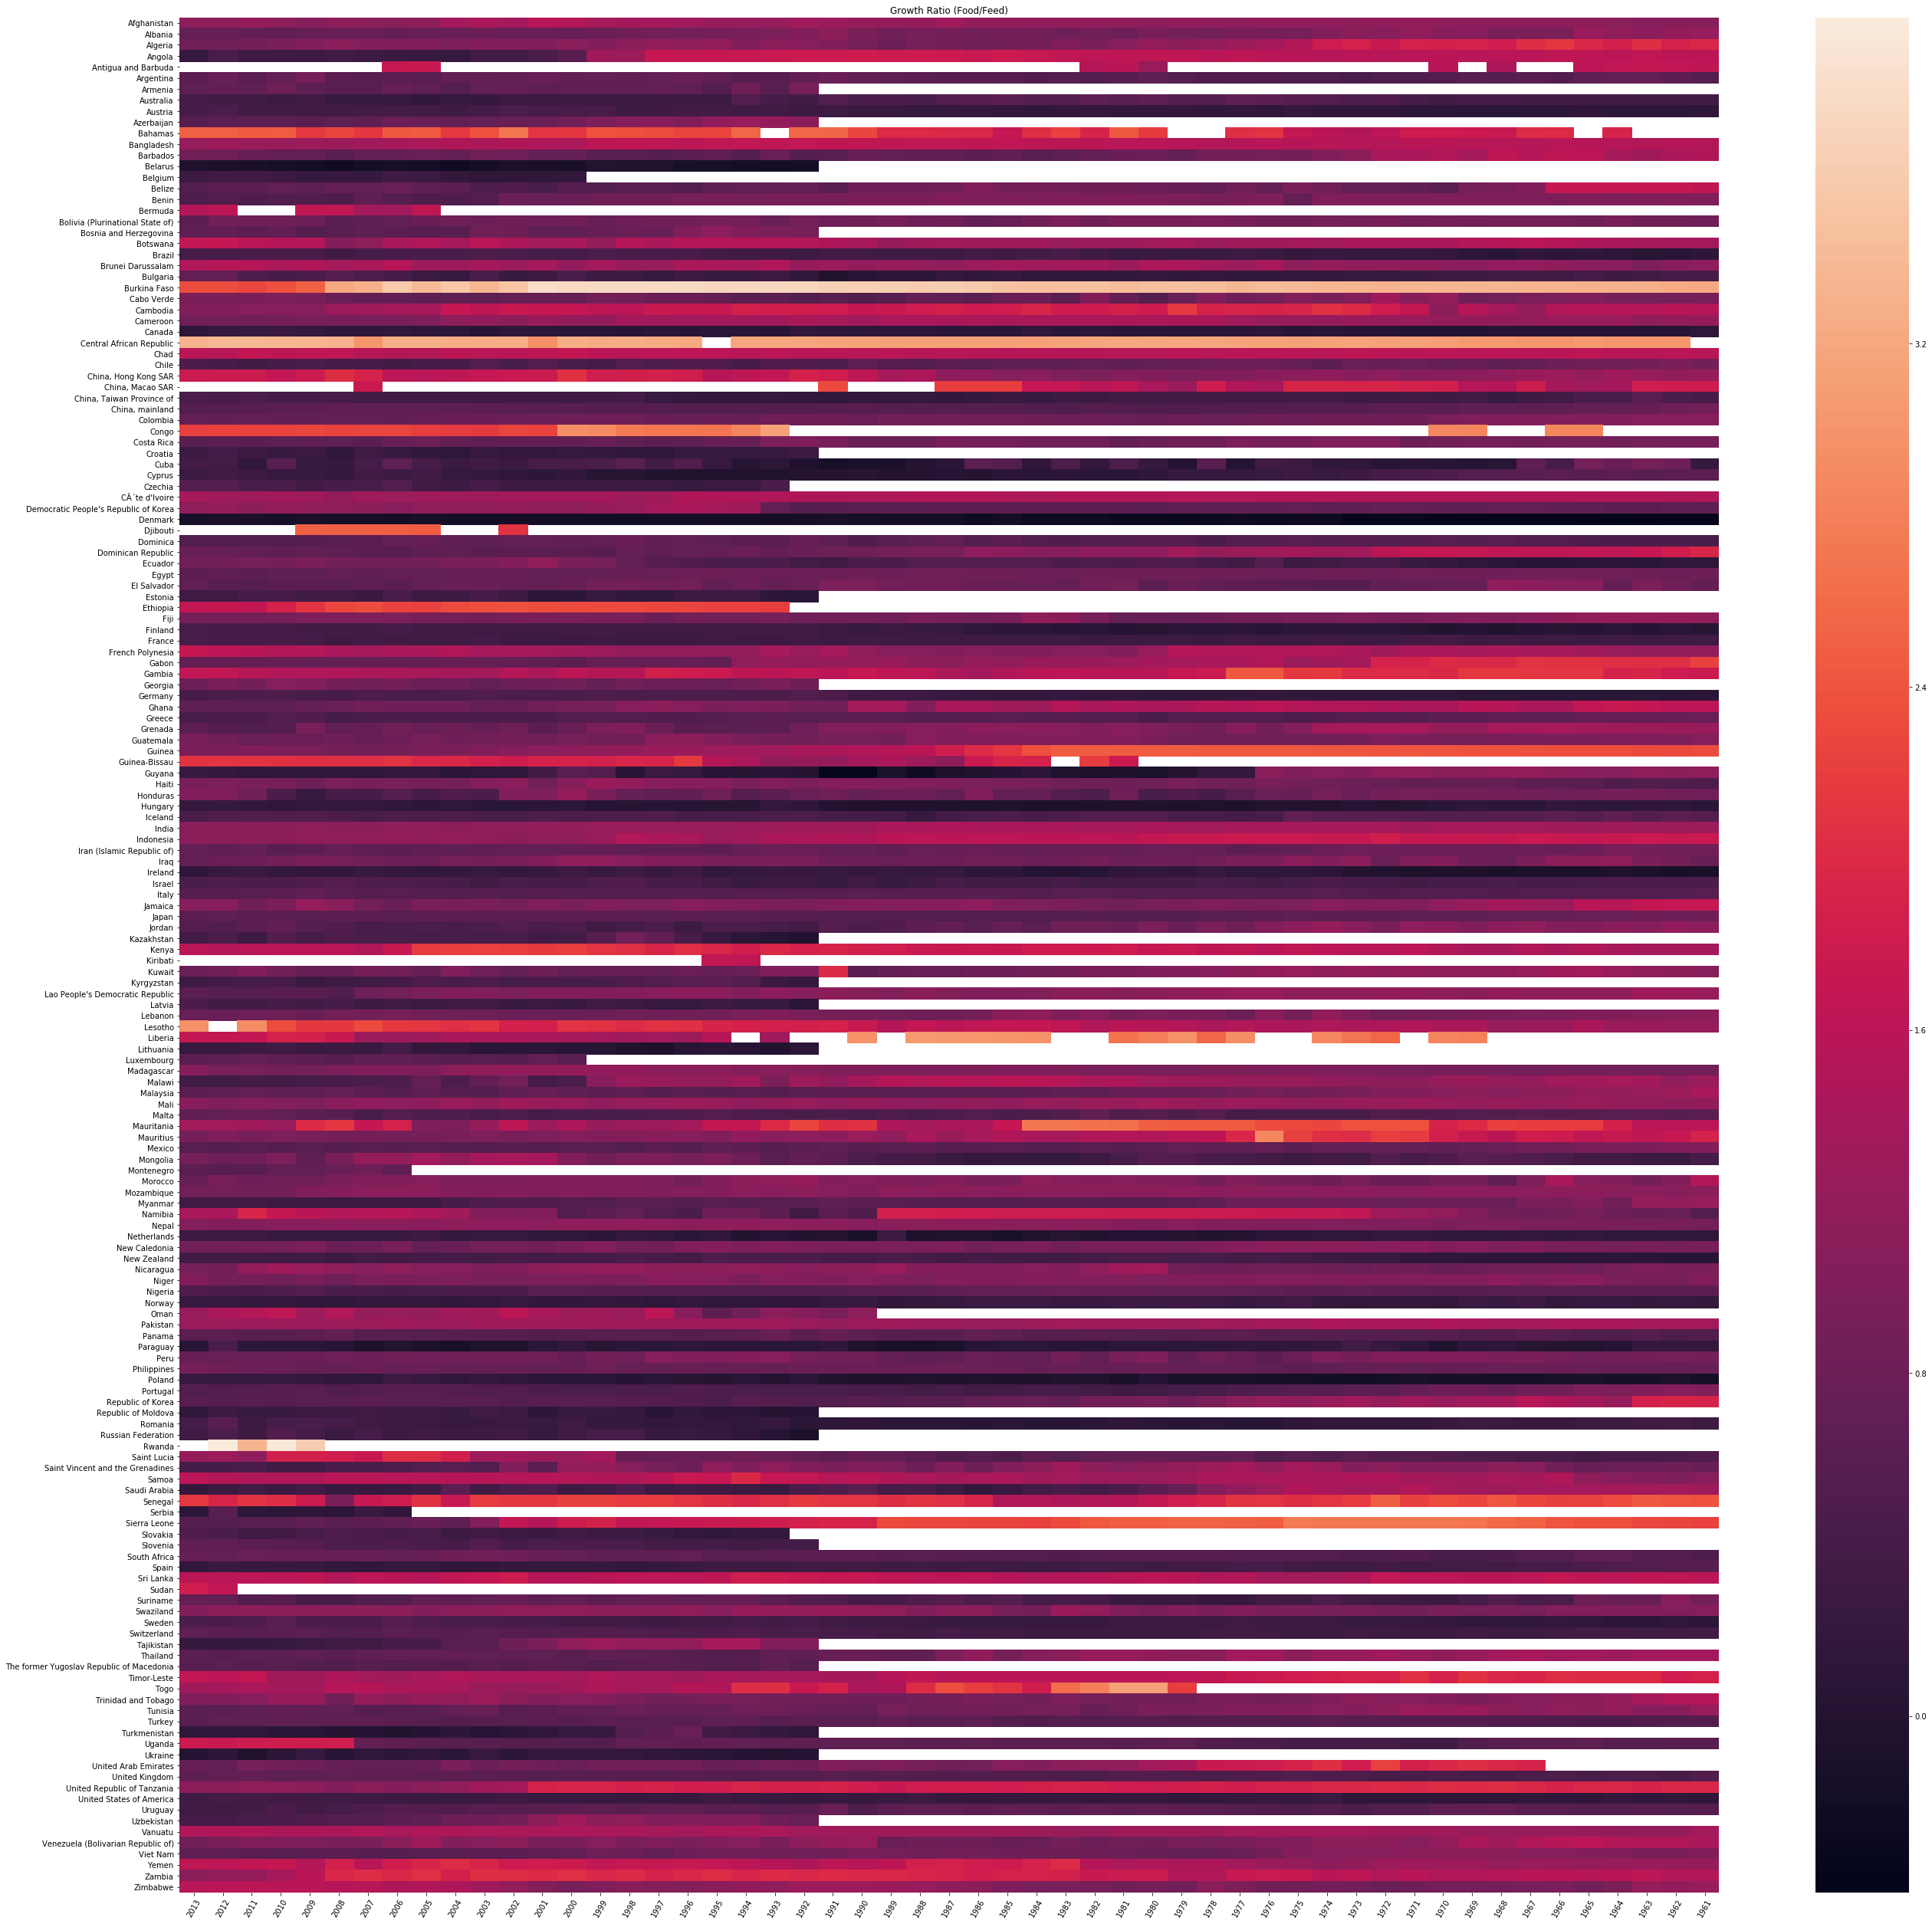

In [165]:
f, axs = plt.subplots(1,1,figsize=(45,45))
ax = sns.heatmap(fo_fe_heatmap.pivot("Area", "Year", "Ratio"))
ax.set_title("Growth Ratio (Food/Feed)")

# Invert X Axis
ax.invert_xaxis()

# Remove Titles
ax.set_ylabel('')    
ax.set_xlabel('')

# Rotate X Labels
plt.xticks(rotation=60)

In [160]:
fo_fe_heatmap["Ratio"] = fo_fe_heatmap["Ratio"].apply(lambda x: math.log10(x))

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5]),
 <a list of 53 Text xticklabel objects>)

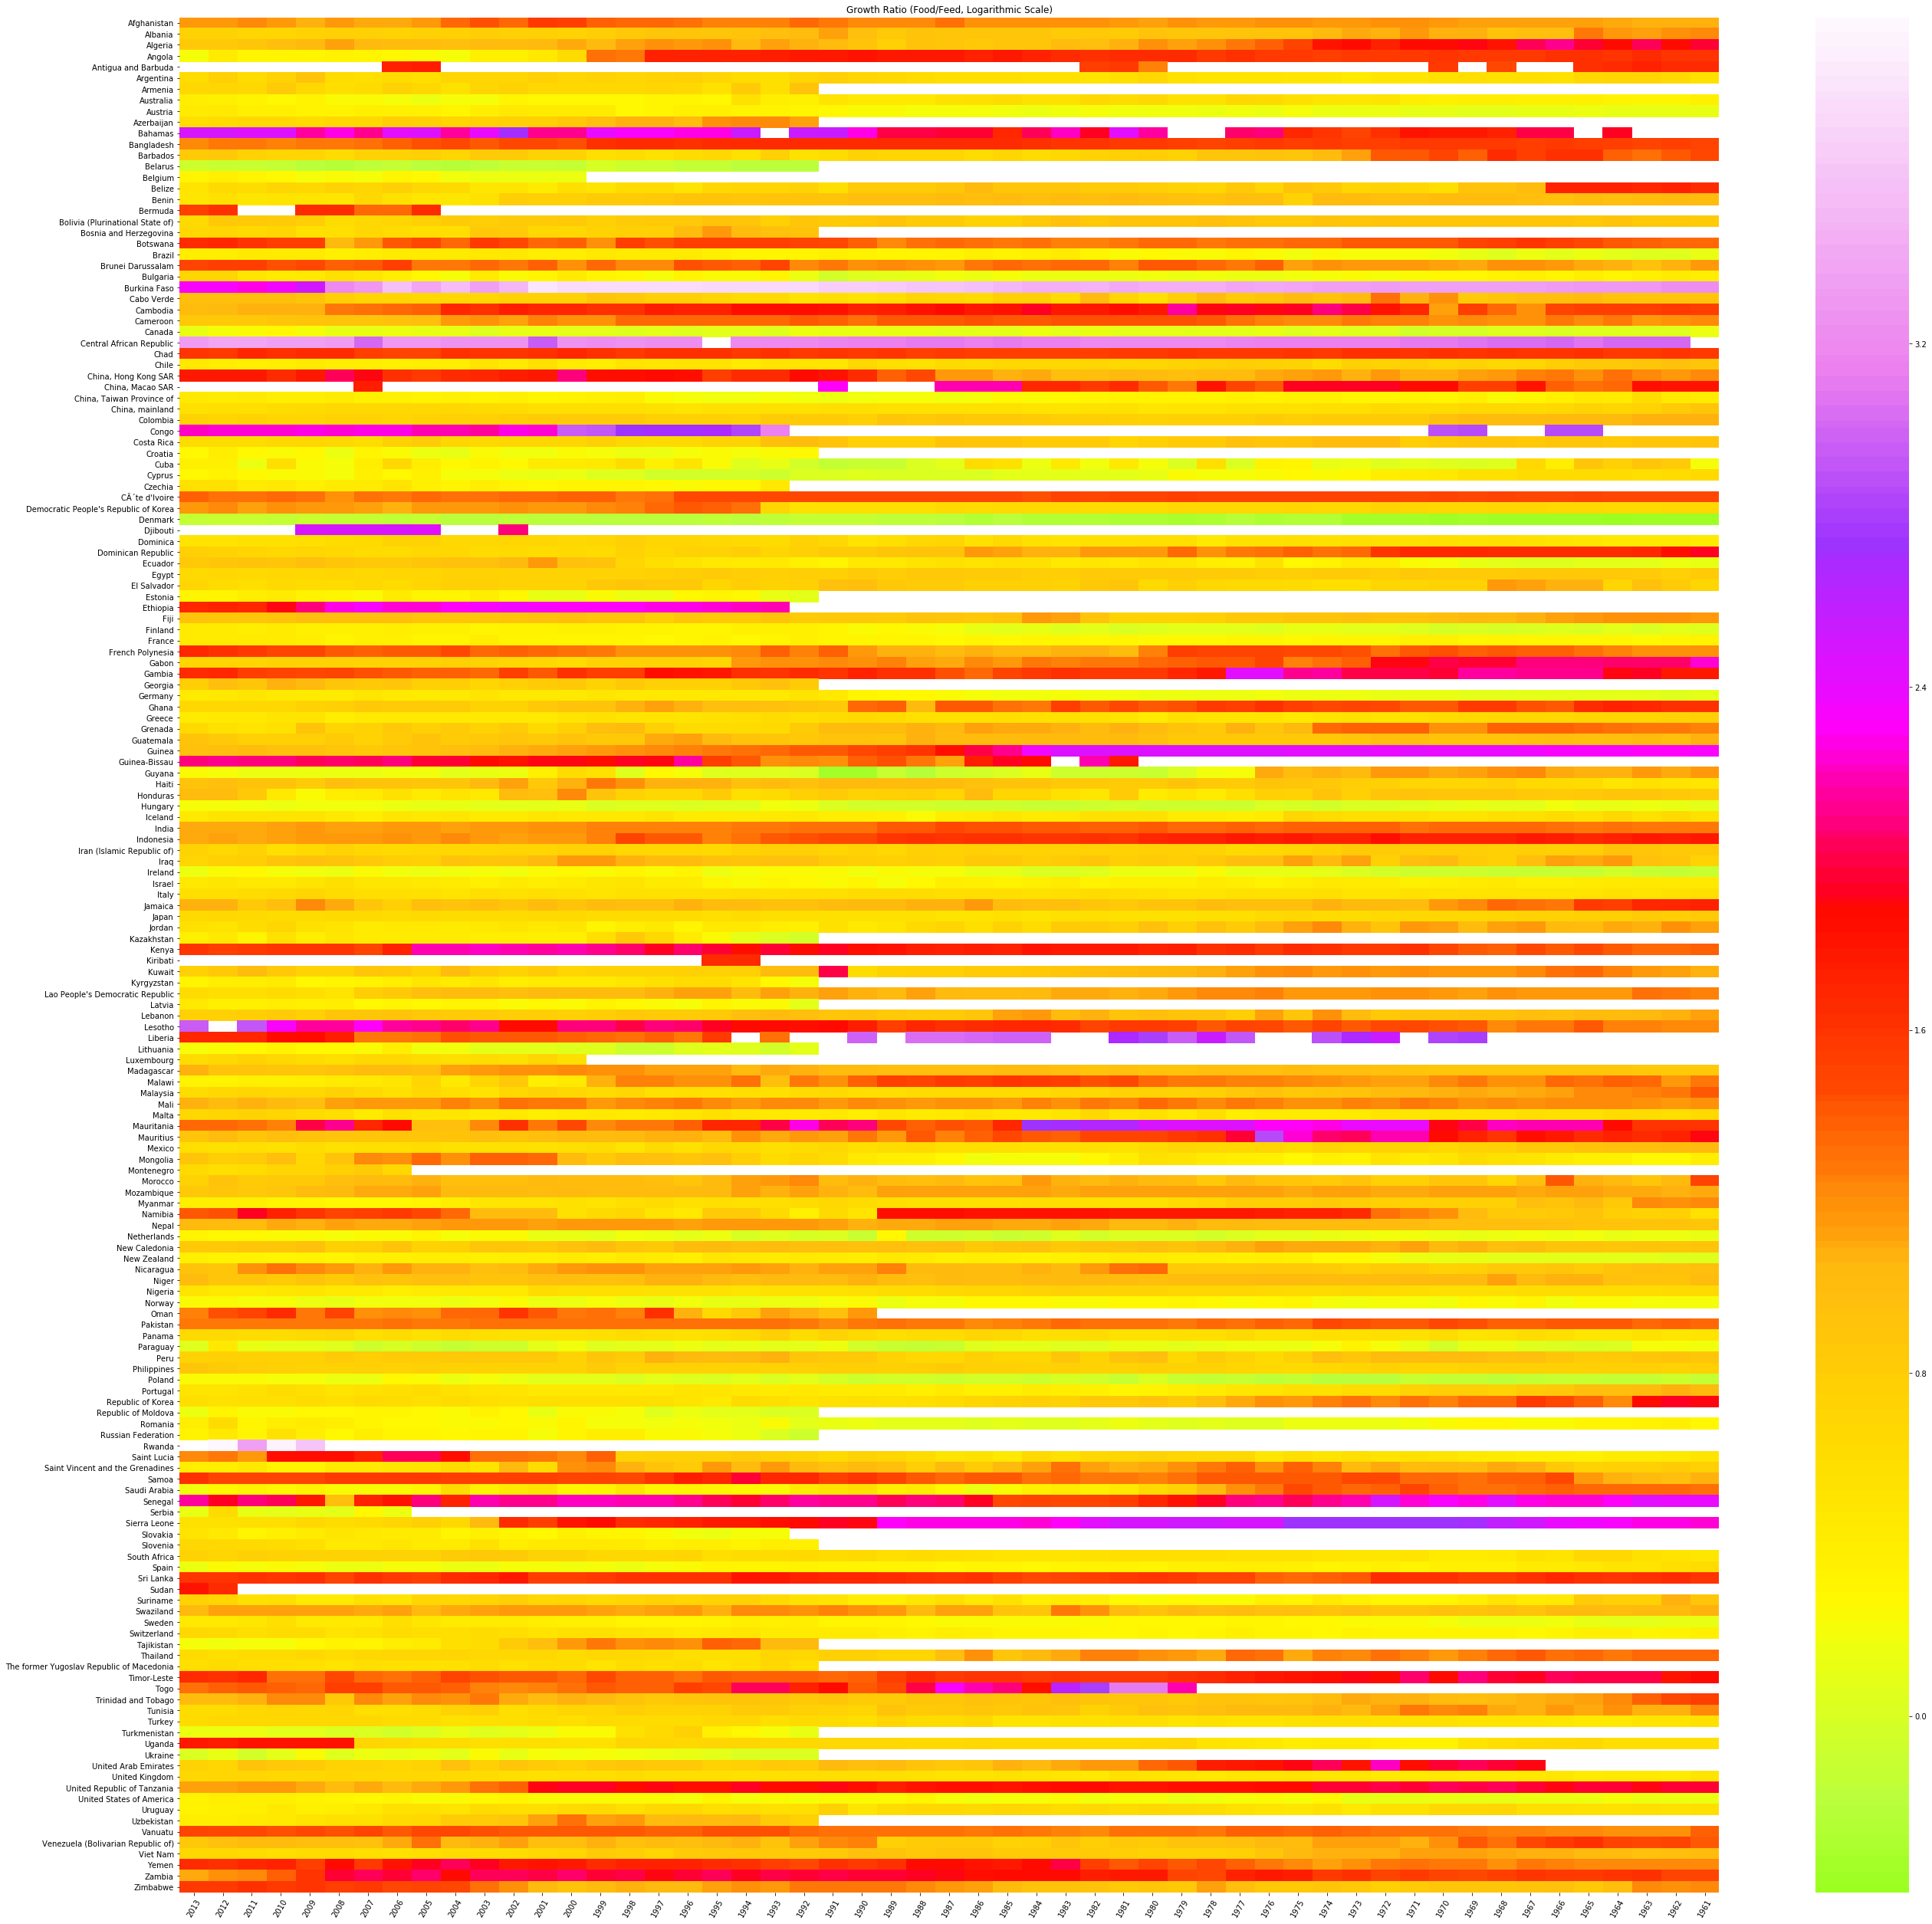

In [164]:
f, axs = plt.subplots(1,1,figsize=(45,45))
ax = sns.heatmap(fo_fe_heatmap.pivot("Area", "Year", "Ratio"), center = 0, cmap = "gist_ncar")
ax.set_title("Growth Ratio (Food/Feed, Logarithmic Scale)")


# Invert X Axis
ax.invert_xaxis()

# Remove Titles
ax.set_ylabel('')    
ax.set_xlabel('')

# Rotate X Labels
plt.xticks(rotation=60)